In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.io import fits

mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix',
                            'image.cmap': 'viridis'})

path = '/astro/store/gradscratch/tmp/scw7/tessData/lightcurves/sec14/'

In [9]:
df = pd.read_csv('14_flare_out.csv')
mask = (df['f_chisq'] < df['g_chisq']) & (df['f_chisq'] > 0) & (df['ed'] > 0)
df = df[mask]
nf = len(df)
nt = len(np.unique(df['TIC']))
print(str(nf) + ' flare detections from ' + str(nt) + ' targets')

2105 flare detections from 615 targets


In [10]:
df

Unnamed: 0                                               file  \
0              0  tess2019198215352-s0014-0000000142439883-0150-...   
1              1  tess2019198215352-s0014-0000000441800756-0150-...   
6              6  tess2019198215352-s0014-0000000028230919-0150-...   
8              8  tess2019198215352-s0014-0000000028230919-0150-...   
9              9  tess2019198215352-s0014-0000000028230919-0150-...   
10            10  tess2019198215352-s0014-0000000103691996-0150-...   
17            17  tess2019198215352-s0014-0000000219428571-0150-...   
18            18  tess2019198215352-s0014-0000000219428571-0150-...   
19            19  tess2019198215352-s0014-0000000219428571-0150-...   
23            23  tess2019198215352-s0014-0000000294676622-0150-...   
24            24  tess2019198215352-s0014-0000000294676622-0150-...   
25            25  tess2019198215352-s0014-0000000377293776-0150-...   
26            26  tess2019198215352-s0014-0000000441742587-0150-...   
29            29  tess2019198215352-s0014-0000000142439879-0150-...   
33            33  tess2019198215352-s0014-0000000303252818-0150-...   
34            34  tess2019198215352-s0014-0000000156152779-0150-...   
35            35  tess2019198215352-s0014-0000000271261402-0150-...   
37            37  tess2019198215352-s0014-0000000377444019-0150-...   
38            44  tess2019198215352-s0014-0000000229706827-0150-...   
39            45  tess2019198215352-s0014-0000000229706827-0150-...   
40            46  tess2019198215352-s0014-0000000229706827-0150-...   
41            47  tess2019198215352-s0014-0000000229706827-0150-...   
43            49  tess2019198215352-s0014-0000000229706827-0150-...   
44            50  tess2019198215352-s0014-0000000042814193-0150-...   
66            72  tess2019198215352-s0014-0000000435406471-0150-...   
72            78  tess2019198215352-s0014-0000000120757718-0150-...   
75            81  tess2019198215352-s0014-0000000120757718-0150-...   
76            82  tess2019198215352-s0014-0000000120757718-0150-...   
77            83  tess2019198215352-s0014-0000000120757718-0150-...   
79            85  tess2019198215352-s0014-0000000120757718-0150-...   
...          ...                                                ...   
5003          46  tess2019198215352-s0014-0000000353011288-0150-...   
5004          47  tess2019198215352-s0014-0000000353011288-0150-...   
5005          48  tess2019198215352-s0014-0000000353011288-0150-...   
5006          49  tess2019198215352-s0014-0000000353011288-0150-...   
5007          50  tess2019198215352-s0014-0000000353011288-0150-...   
5008          51  tess2019198215352-s0014-0000000353011288-0150-...   
5009          52  tess2019198215352-s0014-0000000353011288-0150-...   
5011          54  tess2019198215352-s0014-0000000353011288-0150-...   
5012          55  tess2019198215352-s0014-0000000353011288-0150-...   
5013          56  tess2019198215352-s0014-0000000353011288-0150-...   
5014          57  tess2019198215352-s0014-0000000353011288-0150-...   
5015          58  tess2019198215352-s0014-0000000353011288-0150-...   
5033         103  tess2019198215352-s0014-0000000362104293-0150-...   
5035         462  tess2019198215352-s0014-0000000362104293-0150-...   
5037         464  tess2019198215352-s0014-0000000362104293-0150-...   
5039           3  tess2019198215352-s0014-0000000367681735-0150-...   
5040         403  tess2019198215352-s0014-0000000368437020-0150-...   
5044         501  tess2019198215352-s0014-0000000376870091-0150-...   
5053          35  tess2019198215352-s0014-0000000389917517-0150-...   
5054          36  tess2019198215352-s0014-0000000389917517-0150-...   
5055         394  tess2019198215352-s0014-0000000389917517-0150-...   
5056         395  tess2019198215352-s0014-0000000389917517-0150-...   
5057         474  tess2019198215352-s0014-0000000403245917-0150-...   
5058         475  tess2019198215352-s0014-0000000403245917-0150-...   
5059         121  tess20191982

In [11]:
df_param = pd.read_csv('14_param_out.csv')
df_param

Unnamed: 0                                               file  \
0               0  tess2019198215352-s0014-0000000243488974-0150-...   
1               1  tess2019198215352-s0014-0000000147627264-0150-...   
2               2  tess2019198215352-s0014-0000000417317695-0150-...   
3               3  tess2019198215352-s0014-0000000272757906-0150-...   
4               4  tess2019198215352-s0014-0000000235714953-0150-...   
5               5  tess2019198215352-s0014-0000000157336760-0150-...   
6               6  tess2019198215352-s0014-0000000160491617-0150-...   
7               7  tess2019198215352-s0014-0000000233679255-0150-...   
8               8  tess2019198215352-s0014-0000000288632494-0150-...   
9               9  tess2019198215352-s0014-0000000172422313-0150-...   
10             10  tess2019198215352-s0014-0000001713419350-0150-...   
11             11  tess2019198215352-s0014-0000000233540891-0150-...   
12             12  tess2019198215352-s0014-0000000233574434-0150-...   
13             13  tess2019198215352-s0014-0000000383722026-0150-...   
14             14  tess2019198215352-s0014-0000000064159242-0150-...   
15             15  tess2019198215352-s0014-0000000012486276-0150-...   
16             16  tess2019198215352-s0014-0000000219432606-0150-...   
17             17  tess2019198215352-s0014-0000000026412244-0150-...   
18             18  tess2019198215352-s0014-0000000424719921-0150-...   
19             19  tess2019198215352-s0014-0000000281950041-0150-...   
20             20  tess2019198215352-s0014-0000000288735994-0150-...   
21             21  tess2019198215352-s0014-0000000122890144-0150-...   
22             22  tess2019198215352-s0014-0000000012810761-0150-...   
23             23  tess2019198215352-s0014-0000000160421169-0150-...   
24             24  tess2019198215352-s0014-0000000441767068-0150-...   
25             25  tess2019198215352-s0014-0000000169361620-0150-...   
26             26  tess2019198215352-s0014-0000000198236067-0150-...   
27             27  tess2019198215352-s0014-0000000266477232-0150-...   
28             28  tess2019198215352-s0014-0000000048218527-0150-...   
29             29  tess2019198215352-s0014-0000000007853440-0150-...   
...           ...                                                ...   
29987        1062  tess2019198215352-s0014-0000000458481461-0150-...   
29988         197  tess2019198215352-s0014-0000000458481708-0150-...   
29989         172  tess2019198215352-s0014-0000000459192460-0150-...   
29990         653  tess2019198215352-s0014-0000000459211861-0150-...   
29991         976  tess2019198215352-s0014-0000000459211861-0150-...   
29992         149  tess2019198215352-s0014-0000000459976473-0150-...   
29993         781  tess2019198215352-s0014-0000000459976473-0150-...   
29994         971  tess2019198215352-s0014-0000000459978466-0150-...   
29995          57  tess2019198215352-s0014-0000000459979793-0150-...   
29996         674  tess2019198215352-s0014-0000000459979793-0150-...   
29997         286  tess2019198215352-s0014-0000000462544504-0150-...   
29998         469  tess2019198215352-s0014-0000000462544504-0150-...   
29999         909  tess2019198215352-s0014-0000000467182891-0150-...   
30000         431  tess2019198215352-s0014-0000000467187065-0150-...   
30001         808  tess2019198215352-s0014-0000000467187065-0150-...   
30002          50  tess2019198215352-s0014-0000000467189872-0150-...   
30003         757  tess2019198215352-s0014-0000000467189872-0150-...   
30004         396  tess2019198215352-s0014-0000000471012067-0150-...   
30005        1004  tess2019198215352-s0014-0000000471012067-0150-...   
30006          81  tess2019198215352-s0014-0000000900734088-0150-...   
30007         399  tess2019198215352-s0014-0000001712054455-0150-...   
30008        1007  tess2019198215352-s0014-0000001712054455-0150-...   
30009         341  tess2019198215352-s0014-0000001715269620-0150-...   
30010         510  tess2019198215352-s0014-0000

(1, 100000000.0)

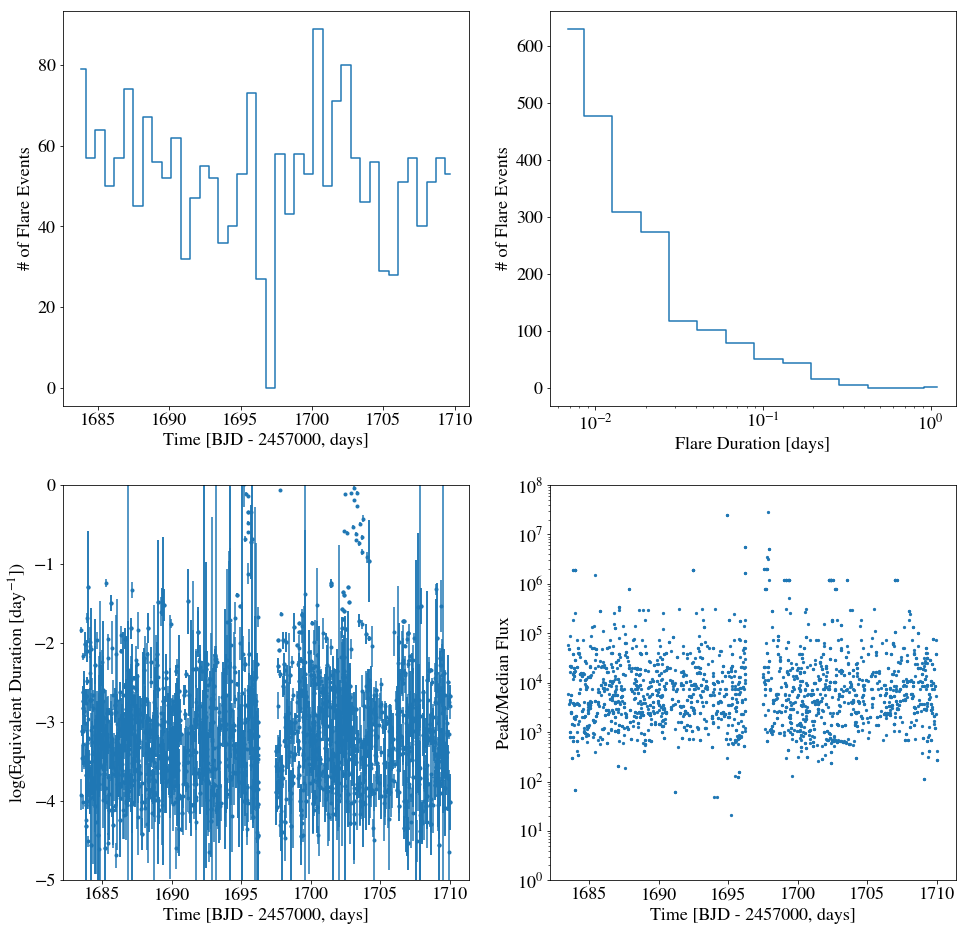

In [12]:
fig, axes = plt.subplots(figsize=(16,16), nrows=2, ncols=2)

hist, bins = np.histogram(df['t0'], bins=40)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][0].plot(bins, hist, linestyle='steps-mid')
axes[0][0].set_xlabel('Time [BJD - 2457000, days]')
axes[0][0].set_ylabel('# of Flare Events')

duration = df['t1'] - df['t0']
bins = np.logspace(np.log10(np.min(duration)), np.log10(np.max(duration)), num=15)
hist, bins = np.histogram(duration, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][1].semilogx(bins, hist, linestyle='steps-mid')
axes[0][1].set_xlabel('Flare Duration [days]')
axes[0][1].set_ylabel('# of Flare Events')

bins = 0.5*(bins[1:] + bins[:-1])
y = np.log10(df['ed'])
yerr = 0.434*df['ed_err']/df['ed']
axes[1][0].errorbar(df['t0'], y, yerr=yerr, fmt='.')
#axes[1][0].set_yscale('log')
axes[1][0].set_ylim(-5, 0)
axes[1][0].set_xlabel('Time [BJD - 2457000, days]')
axes[1][0].set_ylabel(r'log(Equivalent Duration [day$^{-1}$])')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][1].scatter(df['t0'], df['peak']/df['med'], s=5)
axes[1][1].set_yscale('log')
axes[1][1].set_xlabel('Time [BJD - 2457000, days]')
axes[1][1].set_ylabel('Peak/Median Flux')
axes[1][1].set_ylim(1, 1e8)

/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


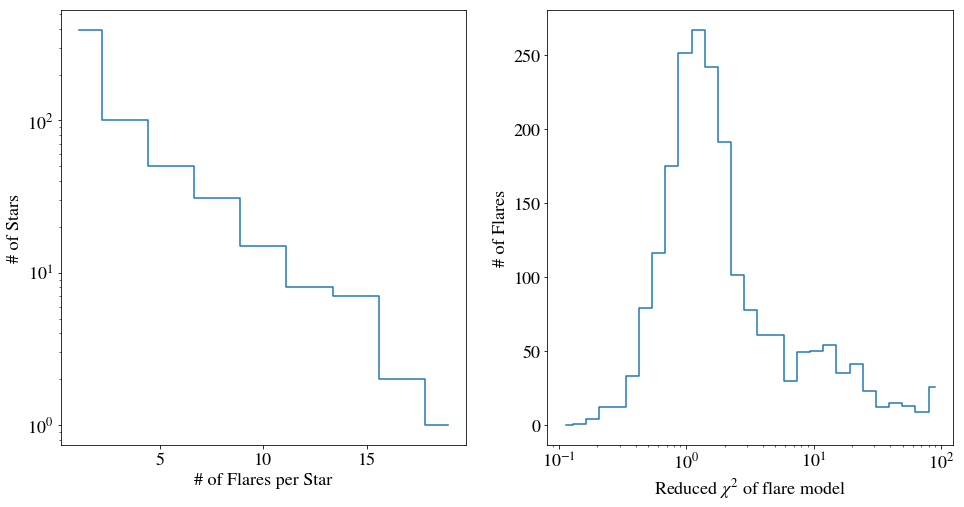

In [13]:
fig, axes = plt.subplots(figsize=(16,8), nrows=1, ncols=2)

unique_tic = df['TIC'].drop_duplicates().as_matrix()
num_flares = np.zeros(len(unique_tic))
for idx, val in enumerate(unique_tic):
    num_flares[idx] = len(df[df['TIC'] == val])

bins = np.linspace(0, 20, num=10)
hist, bins = np.histogram(num_flares, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0].plot(bins, hist, linestyle='steps-mid')
axes[0].set_xlabel('# of Flares per Star')
axes[0].set_ylabel('# of Stars')
axes[0].set_yscale('log')

q = df['f_chisq']
bins = np.logspace(-1, 2, num=30)
hist, bins = np.histogram(q, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[1].plot(bins, hist, linestyle='steps-mid')
axes[1].set_xlabel(r'Reduced $\chi^{2}$ of flare model')
axes[1].set_ylabel('# of Flares')
axes[1].set_xscale('log')

/astro/users/scw7/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


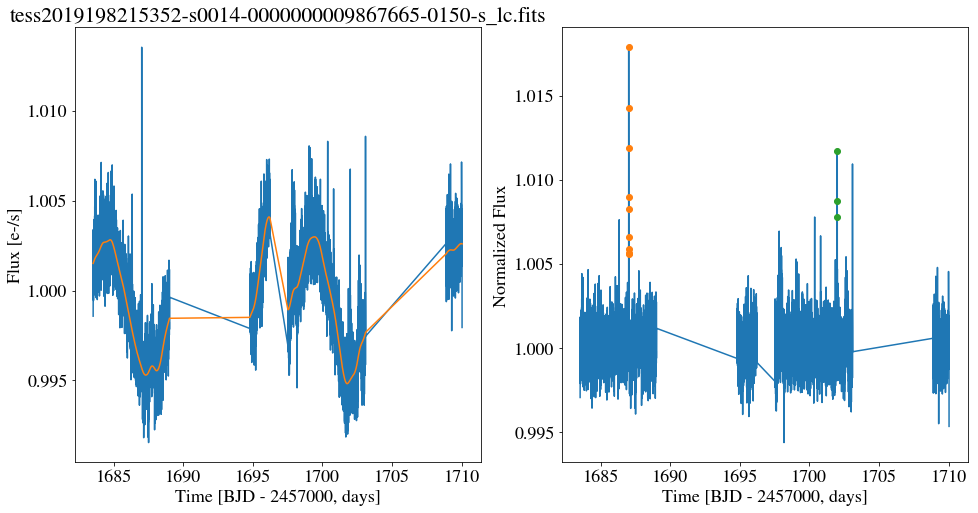

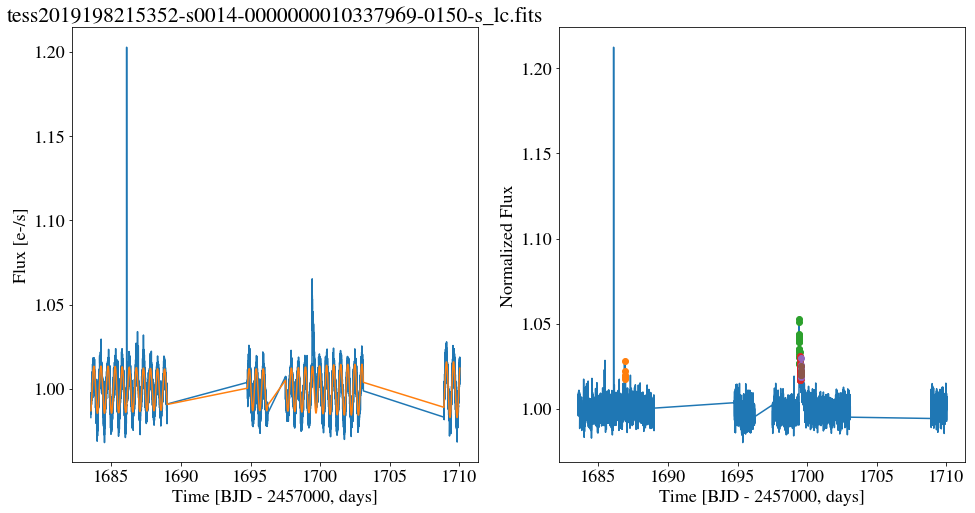

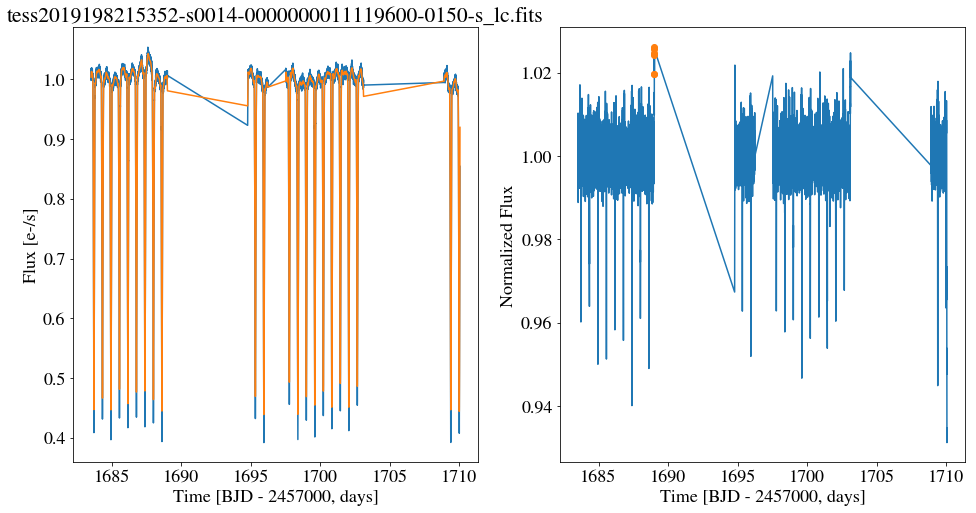

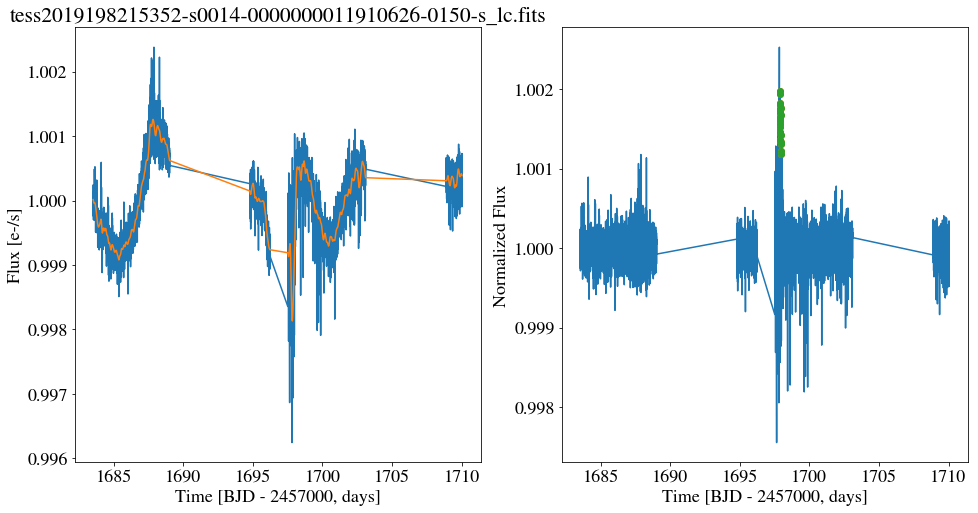

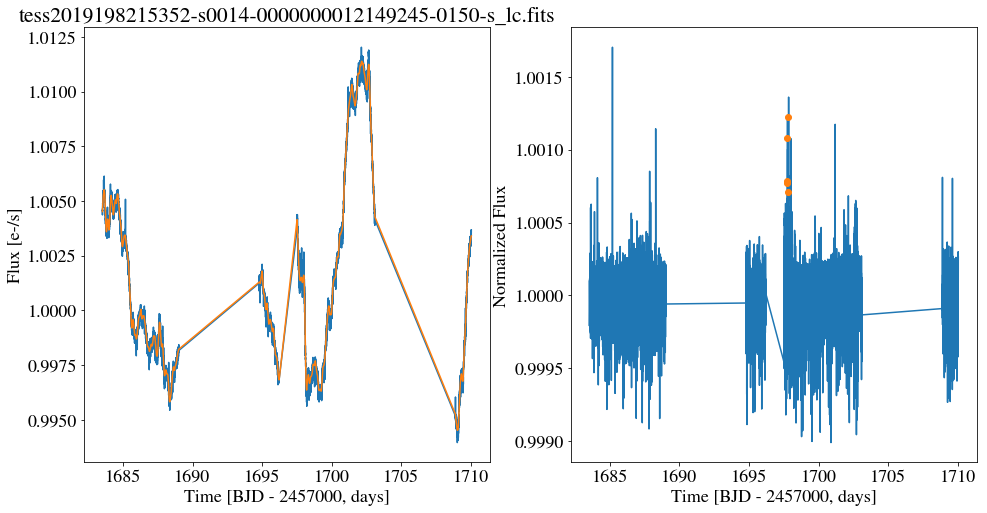

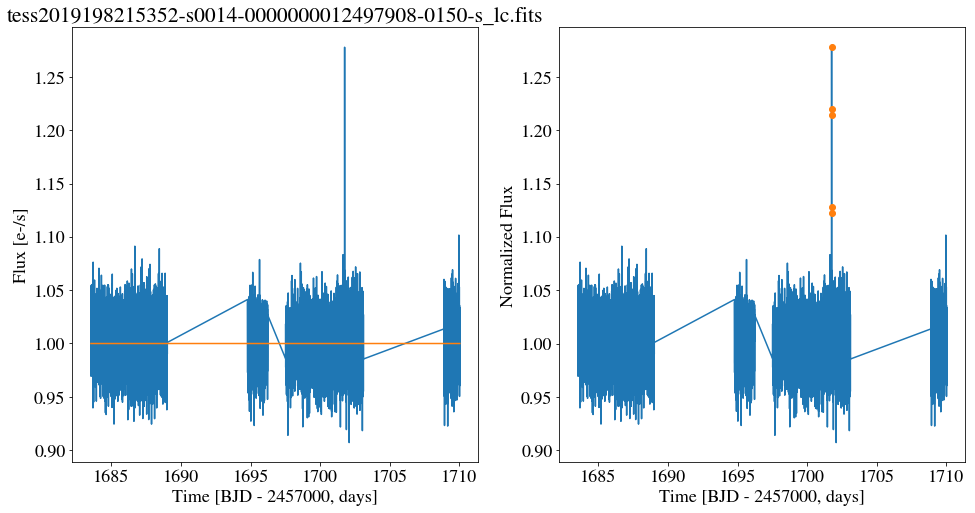

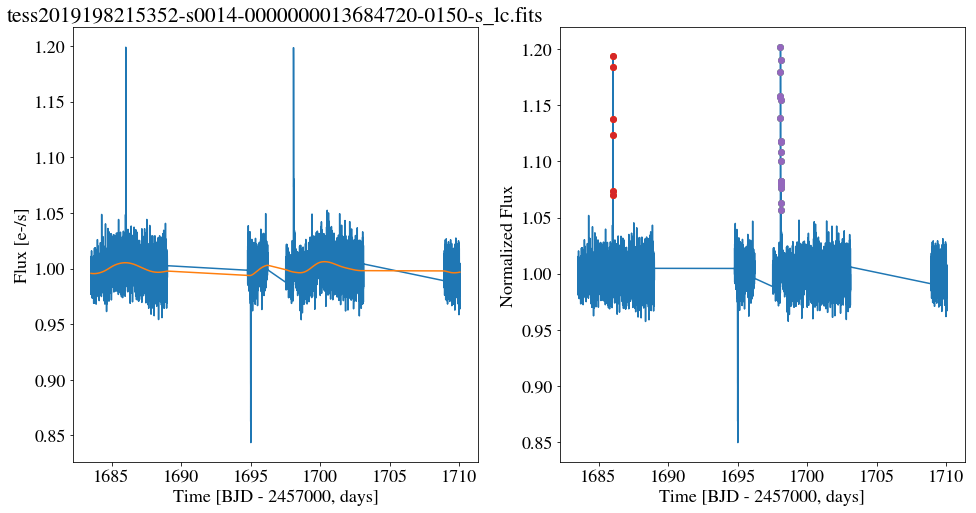

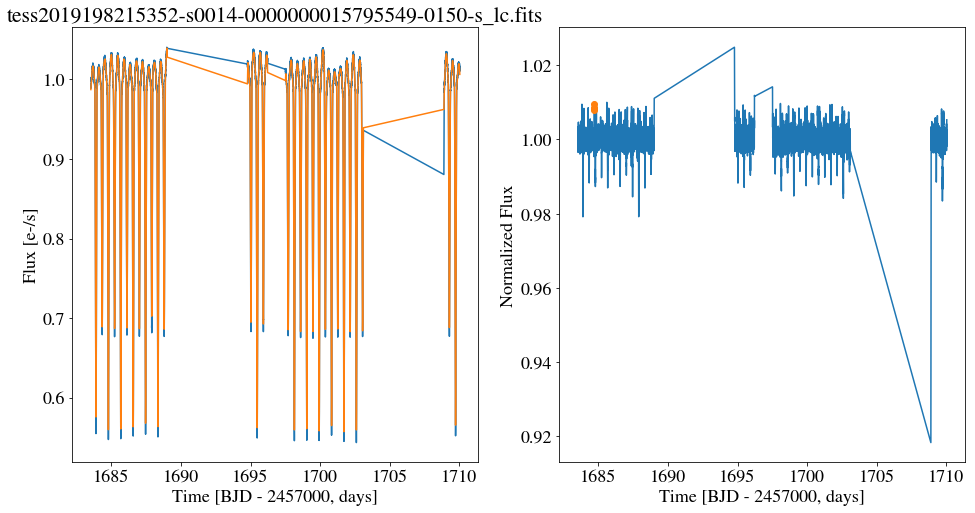

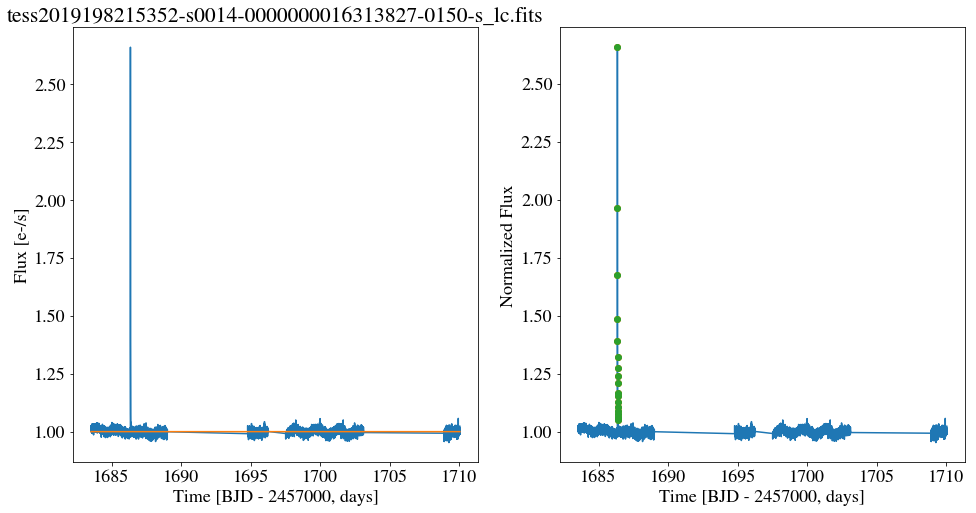

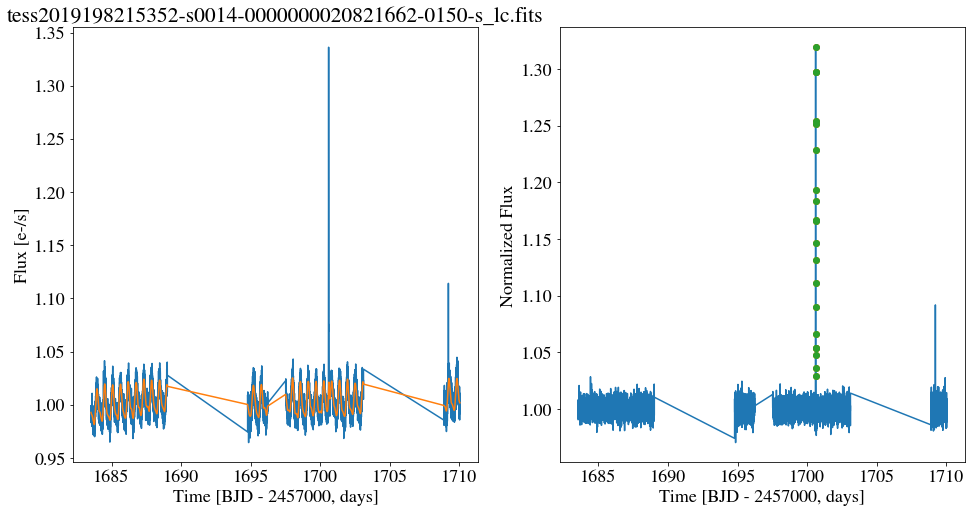

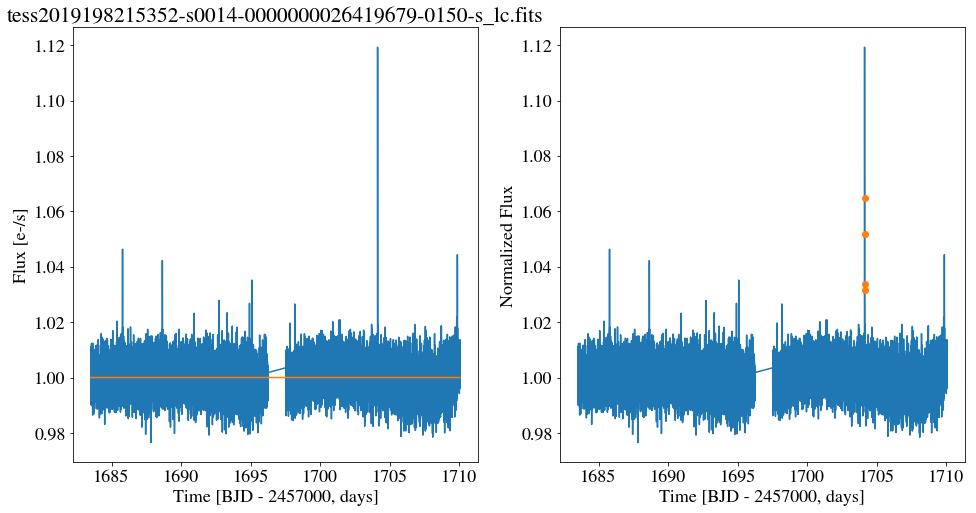

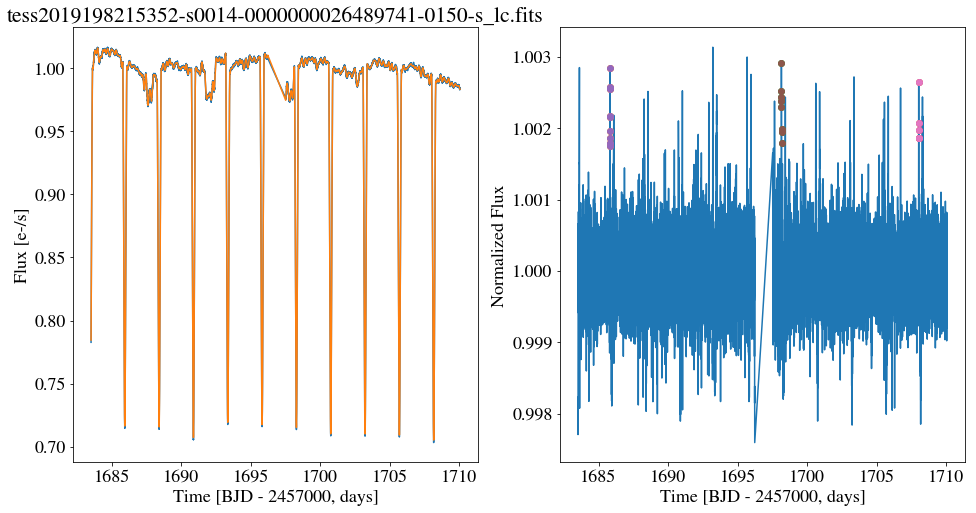

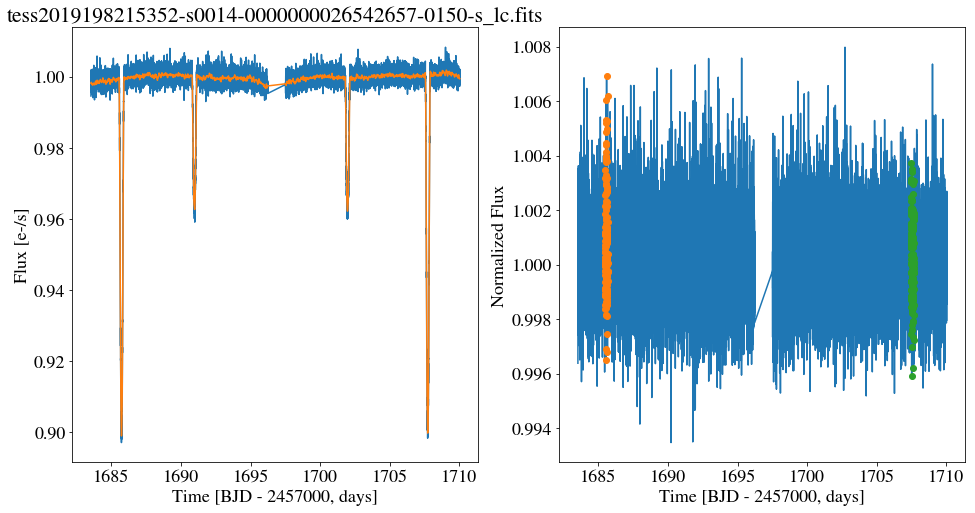

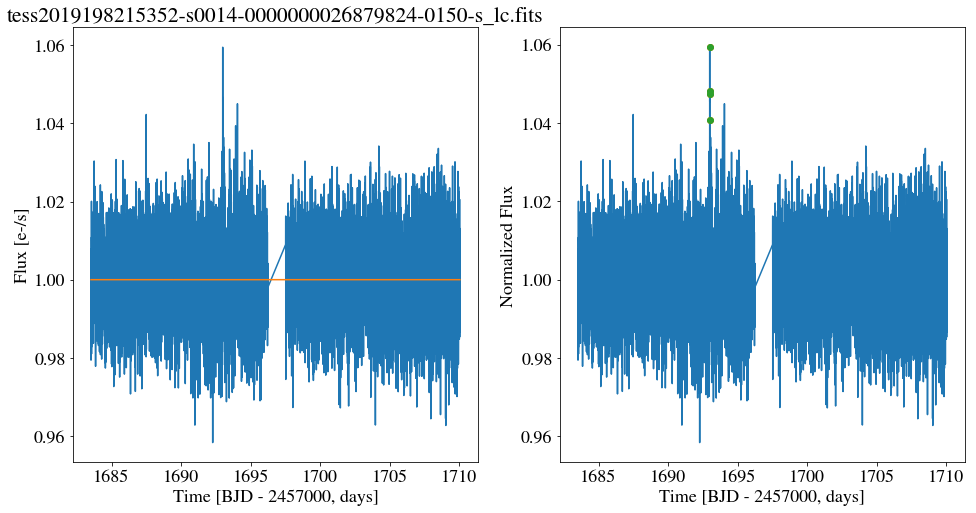

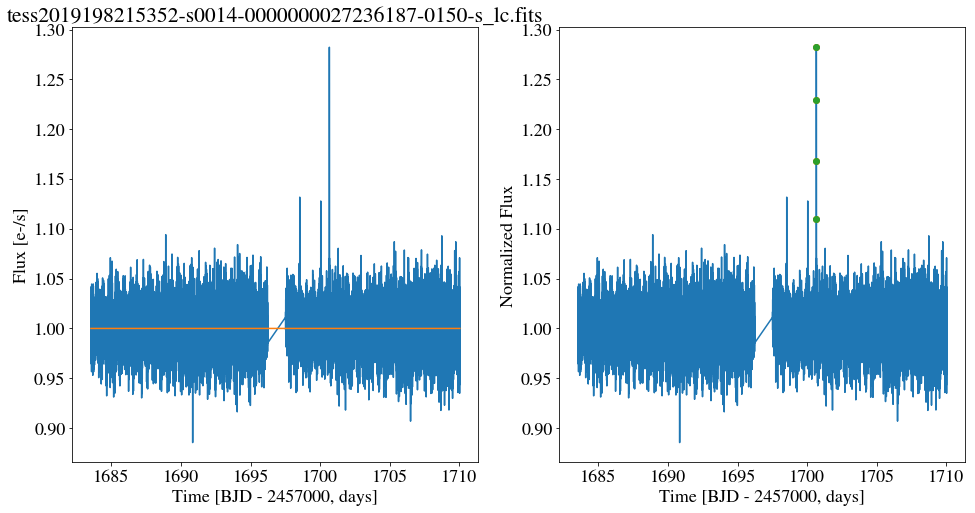

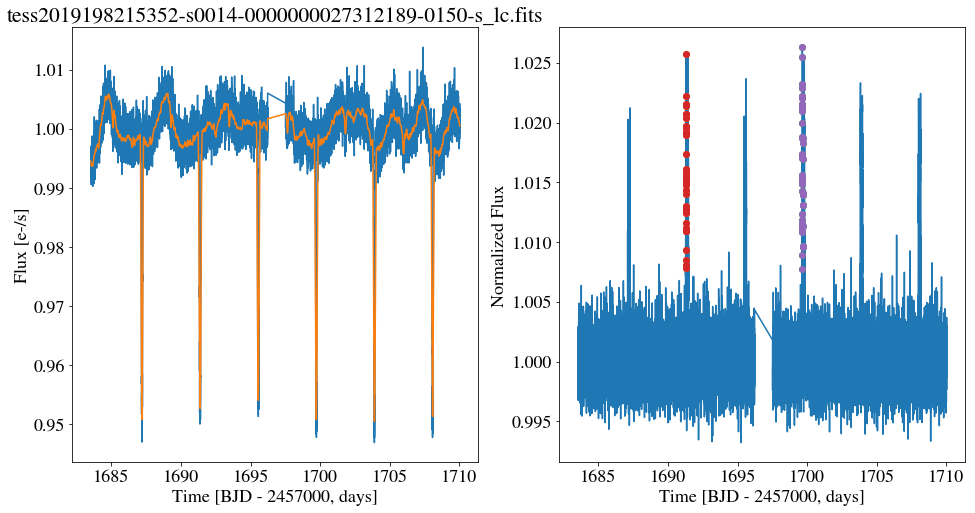

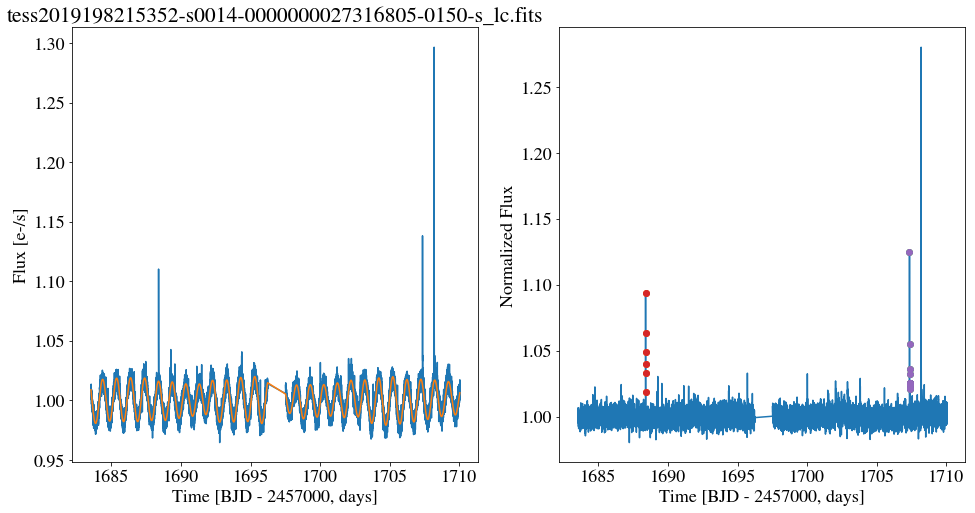

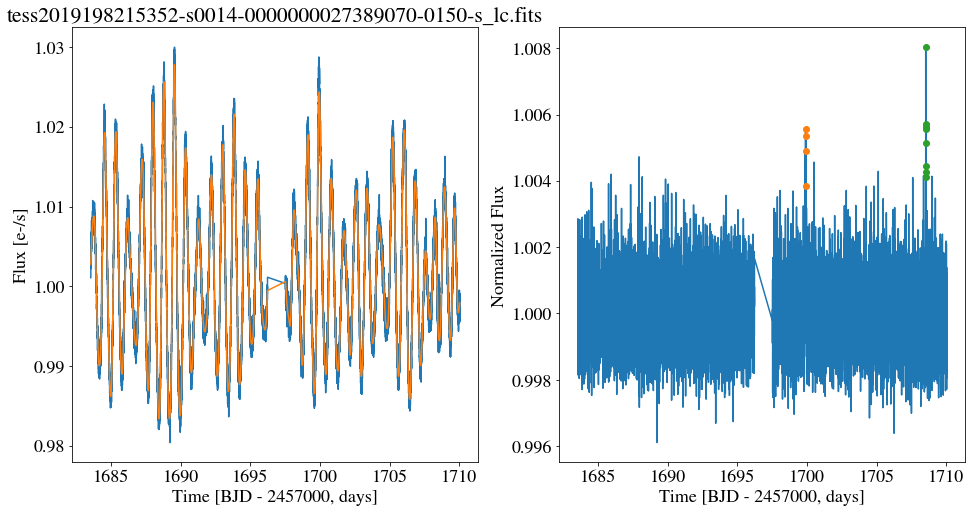

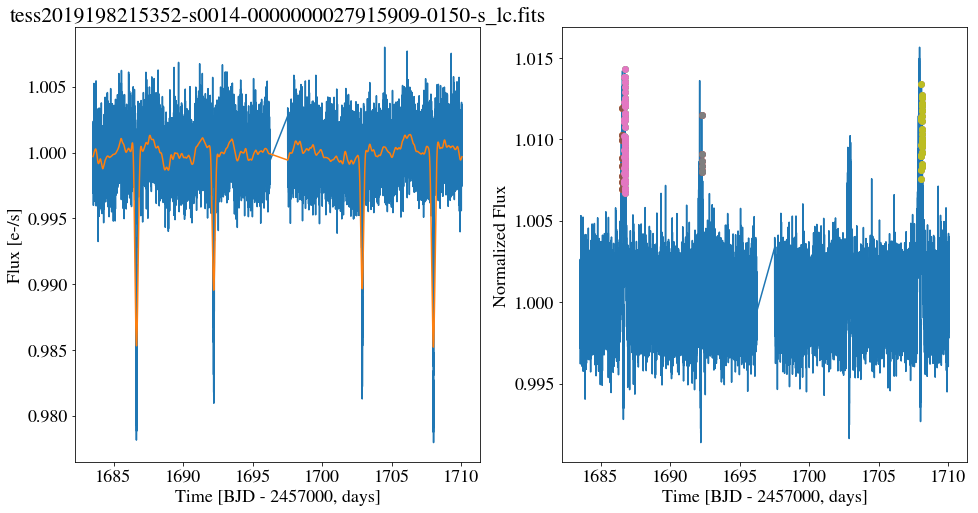

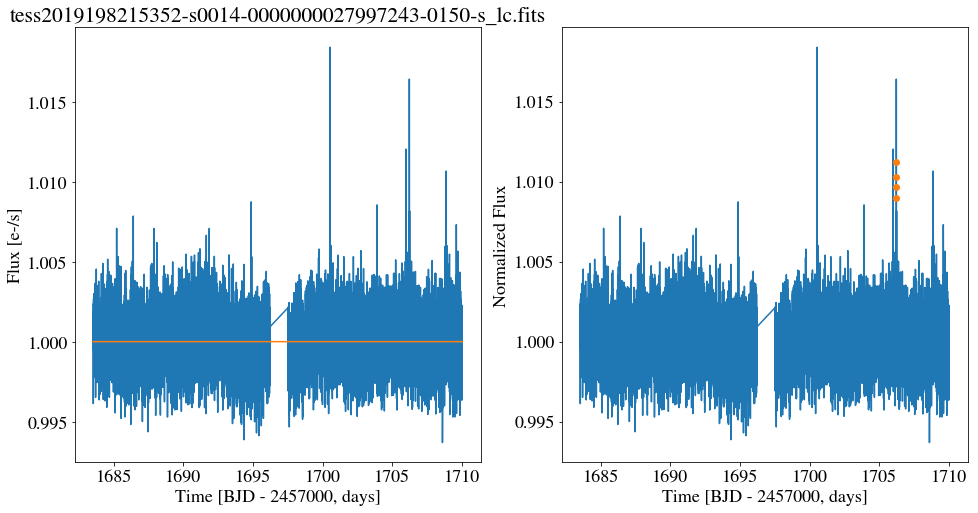

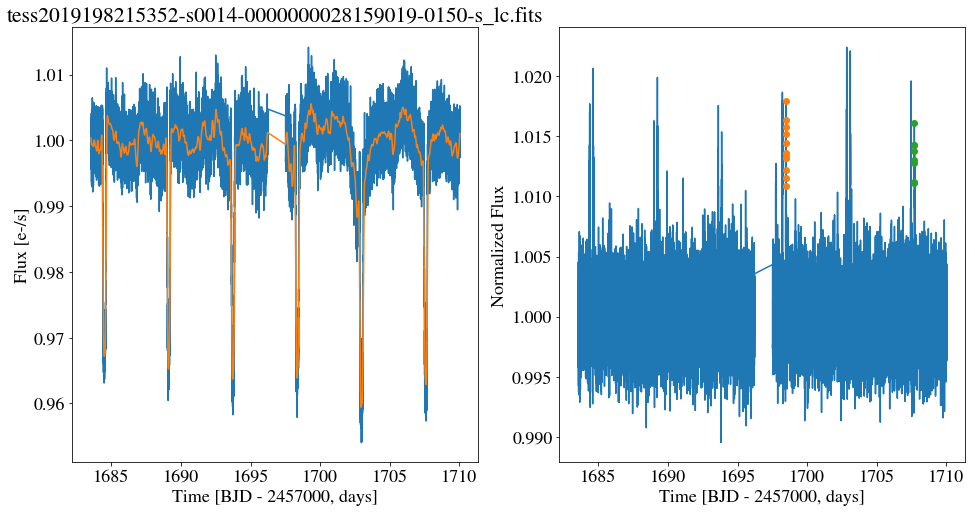

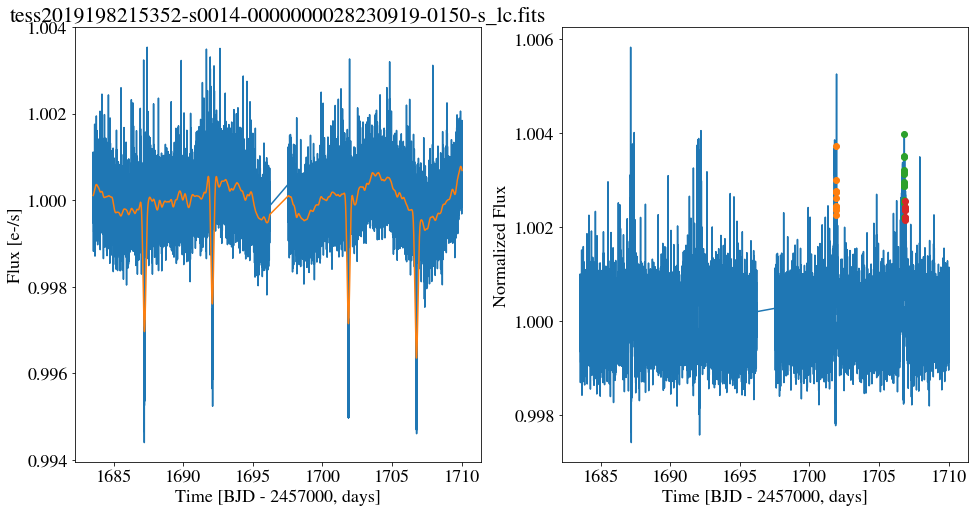

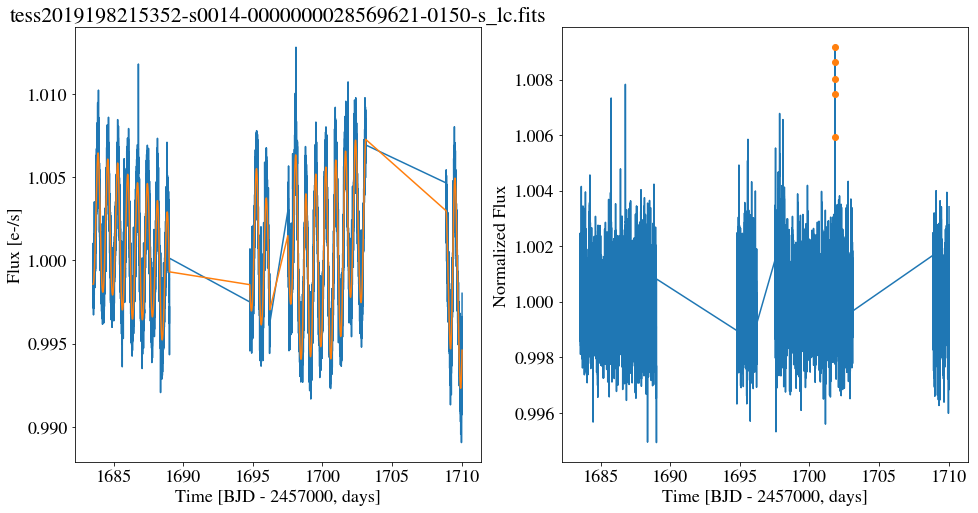

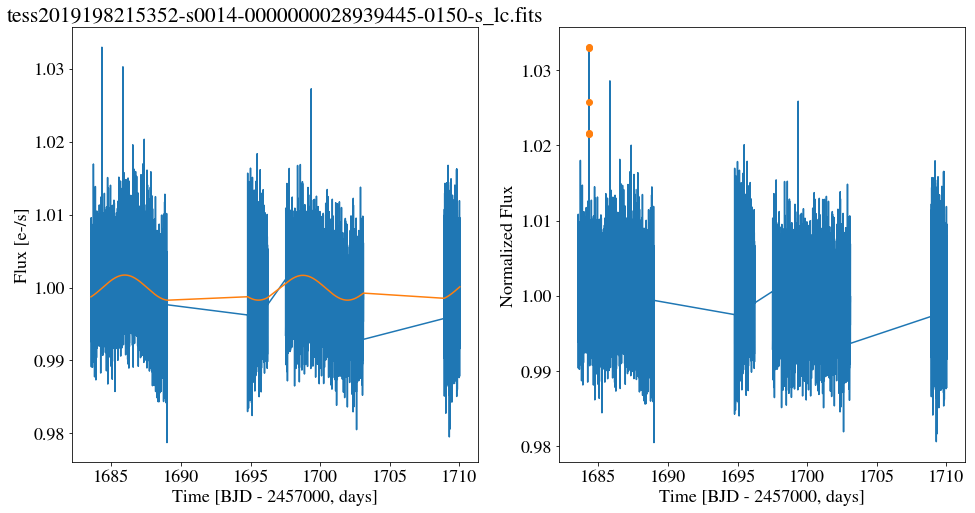

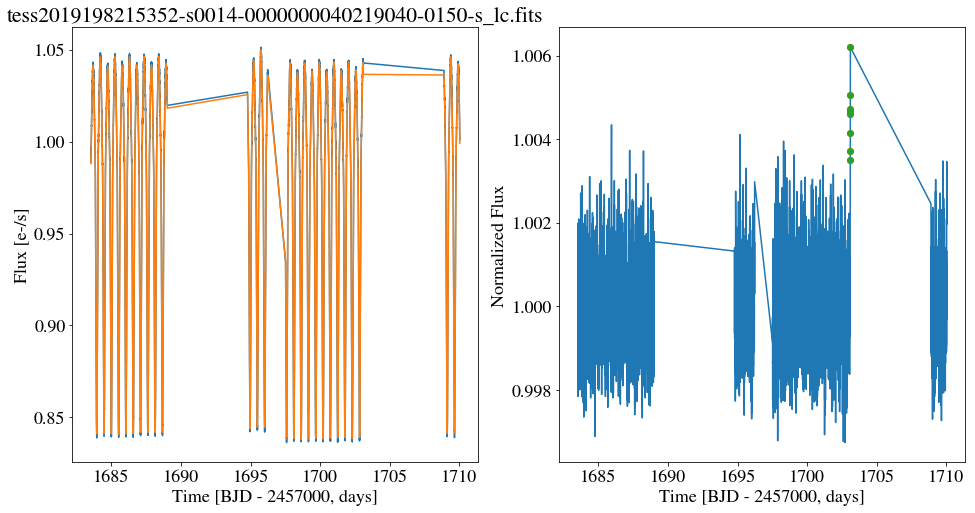

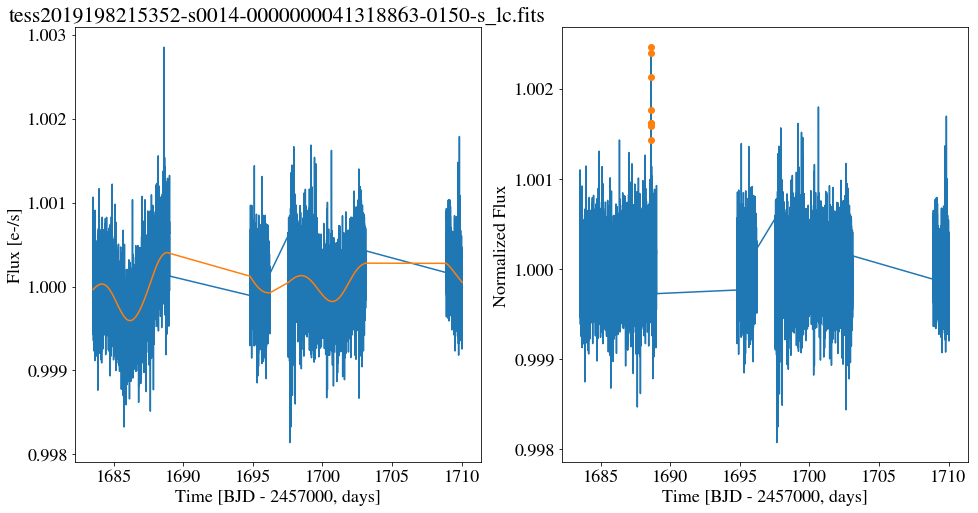

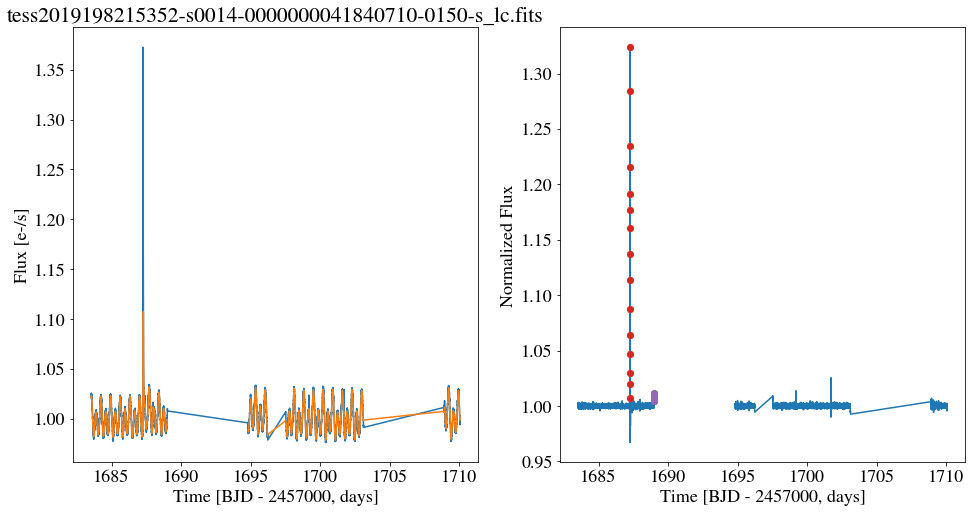

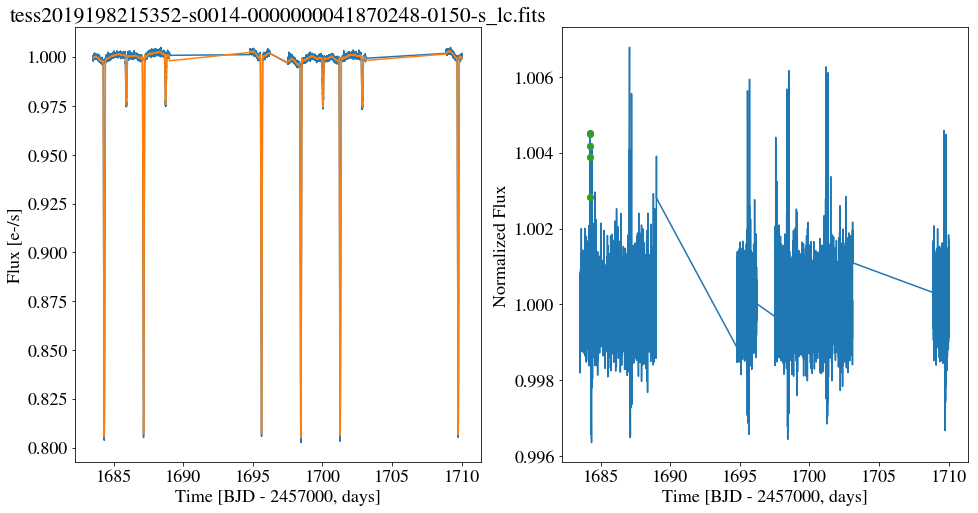

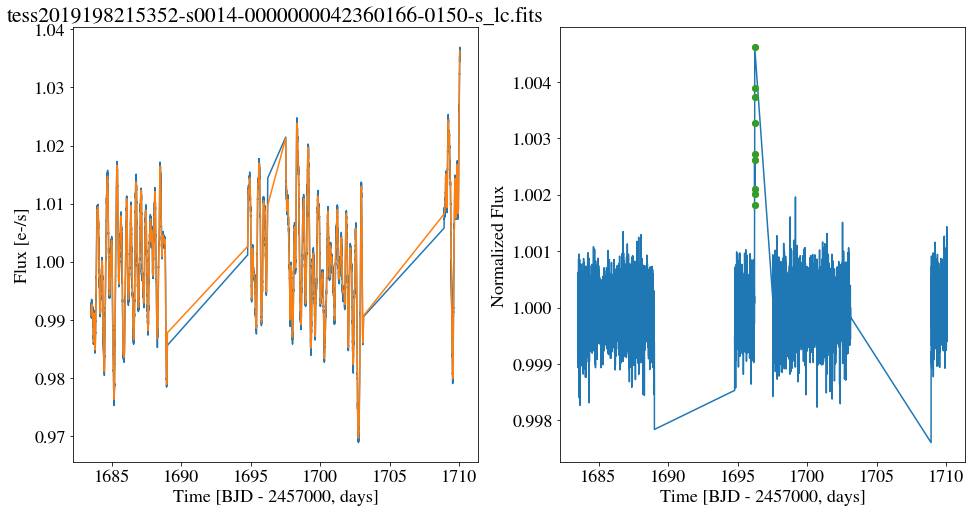

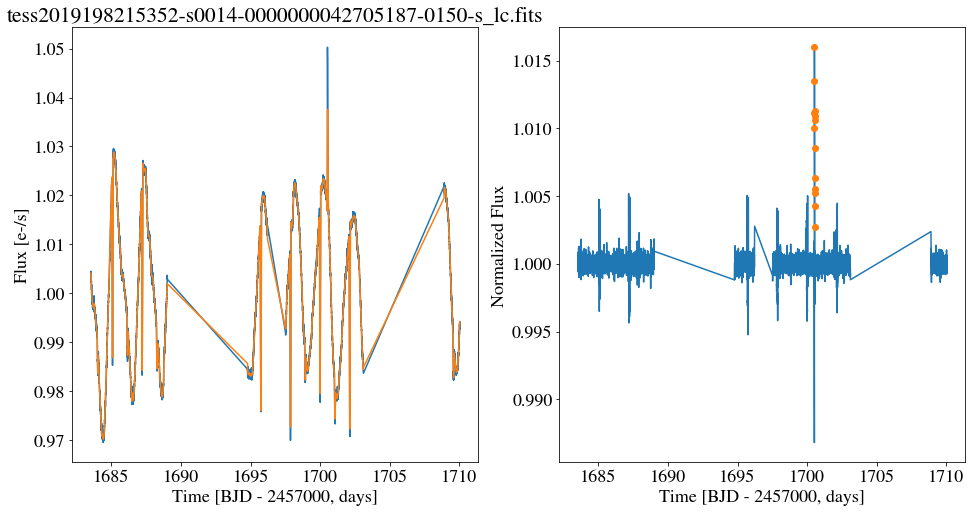

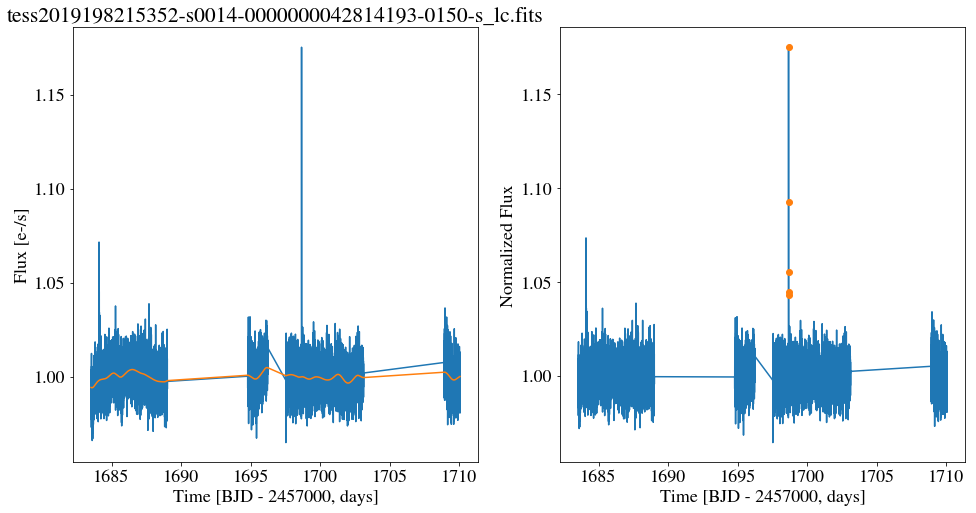

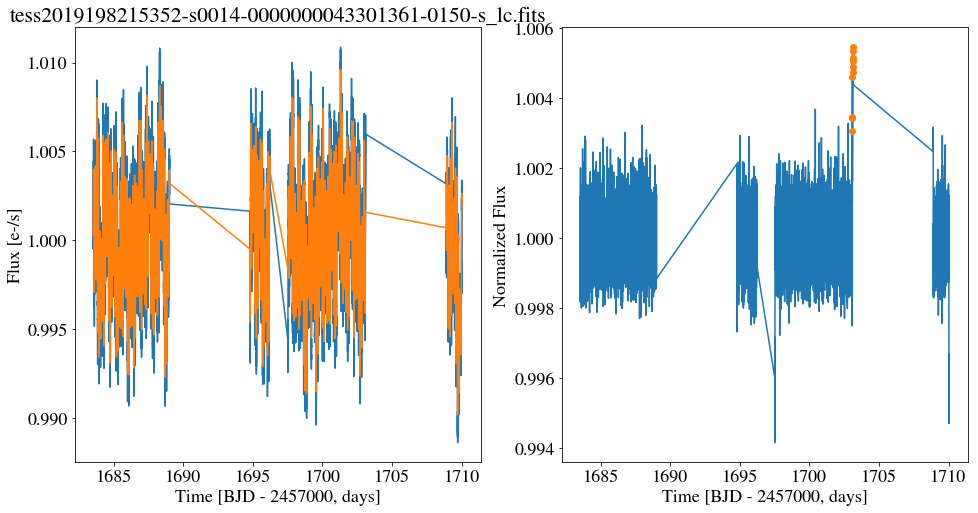

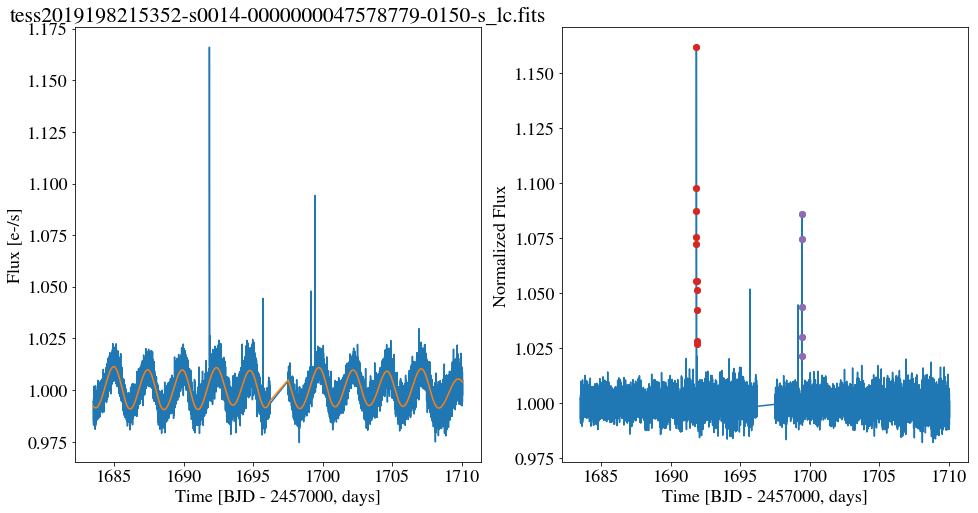

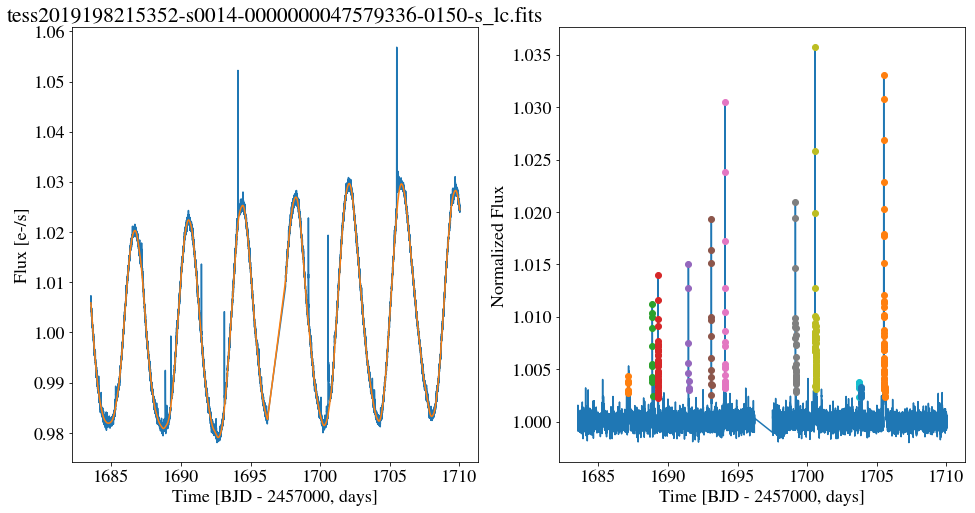

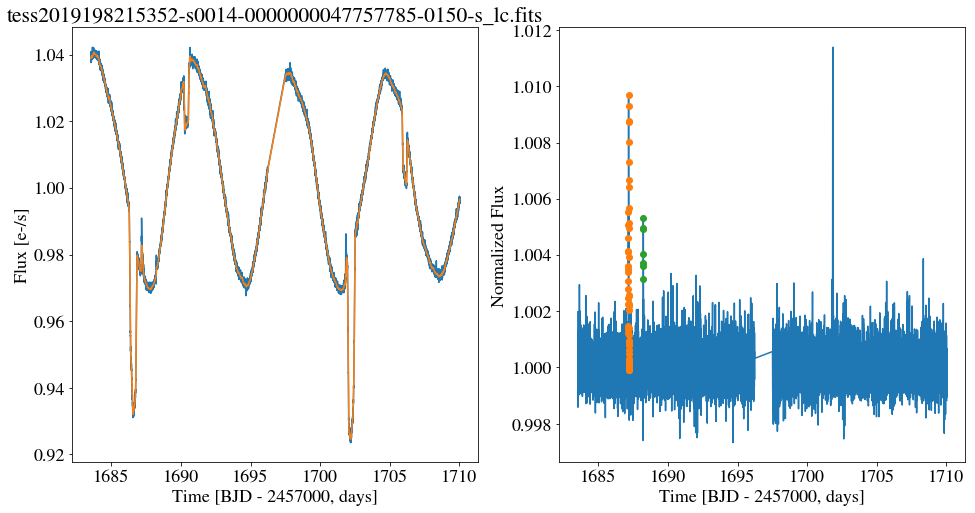

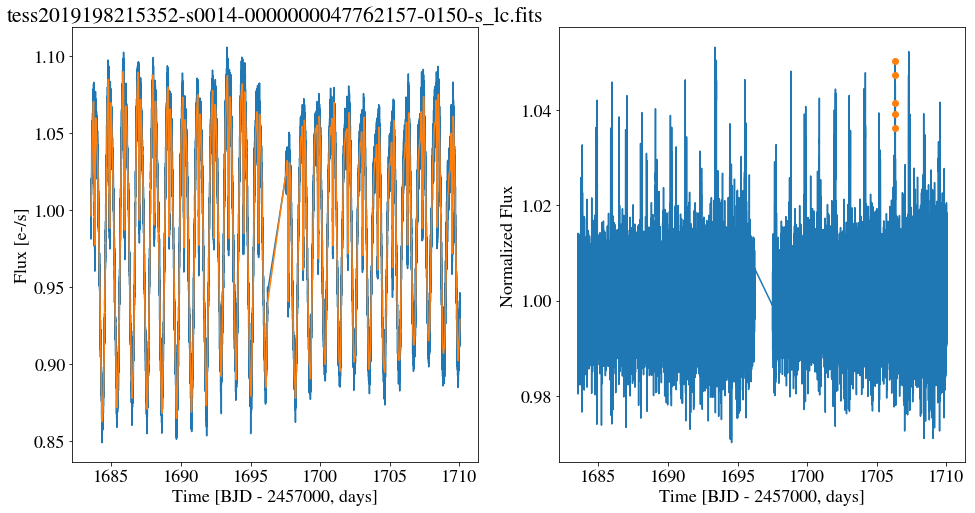

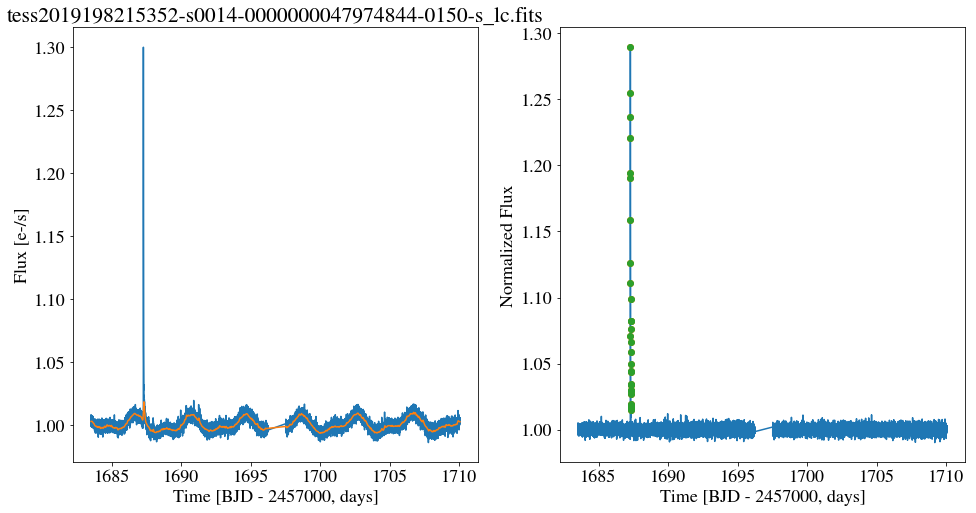

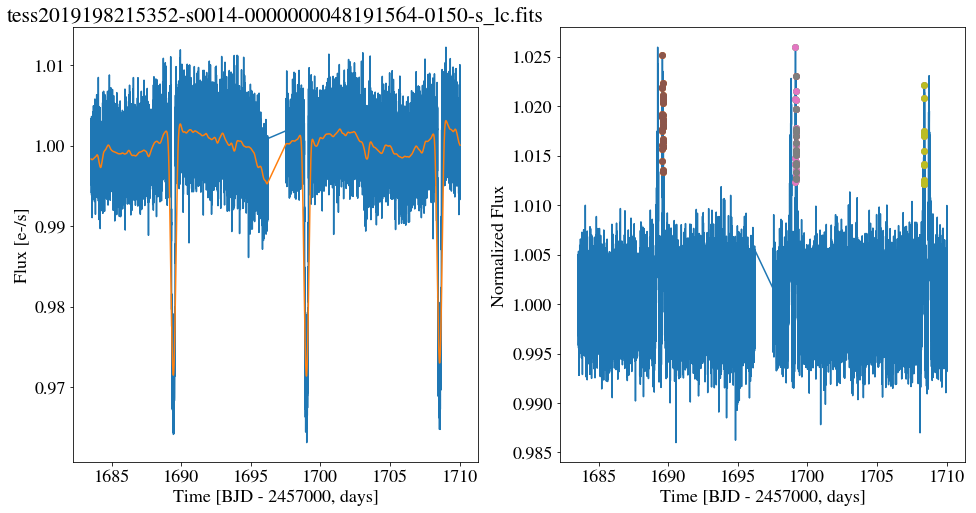

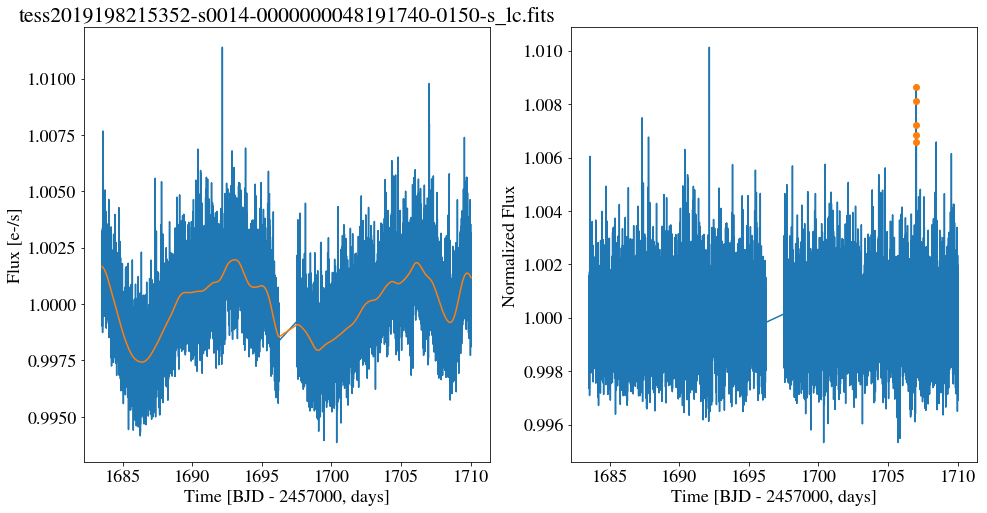

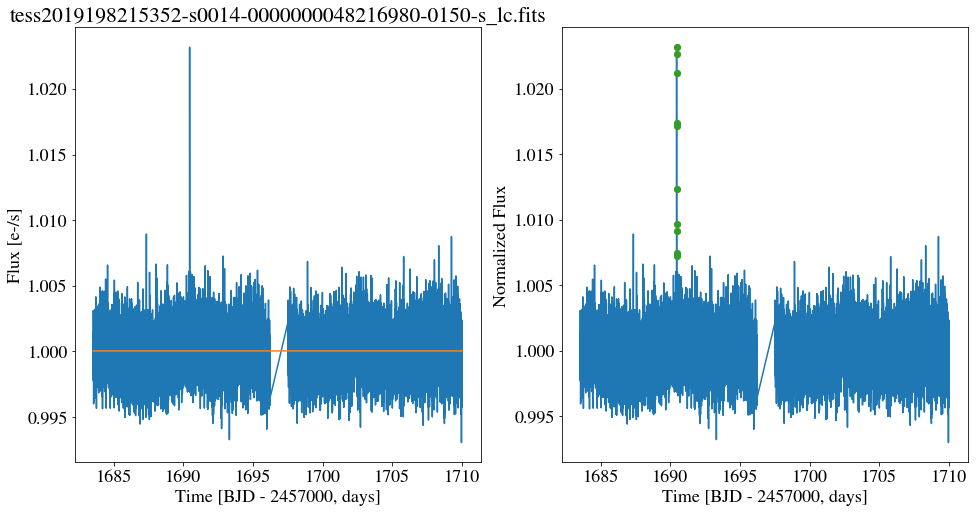

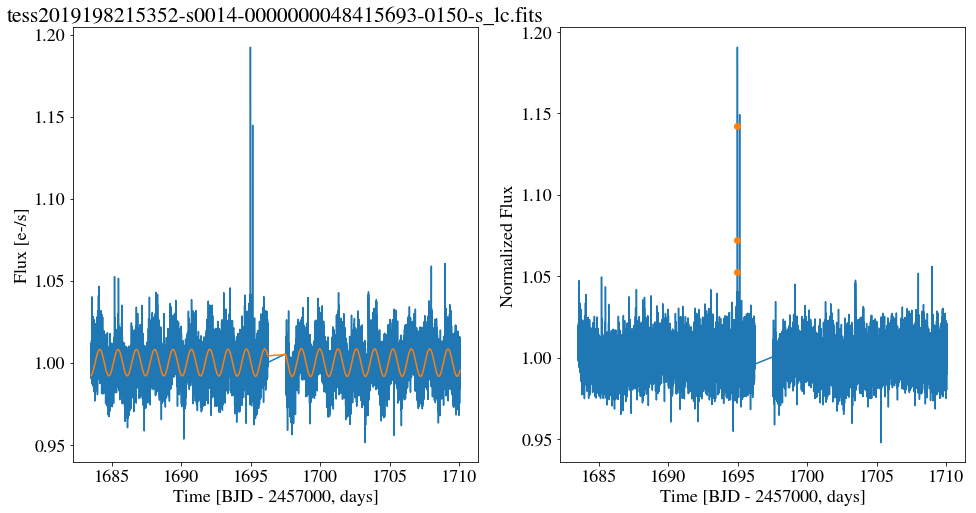

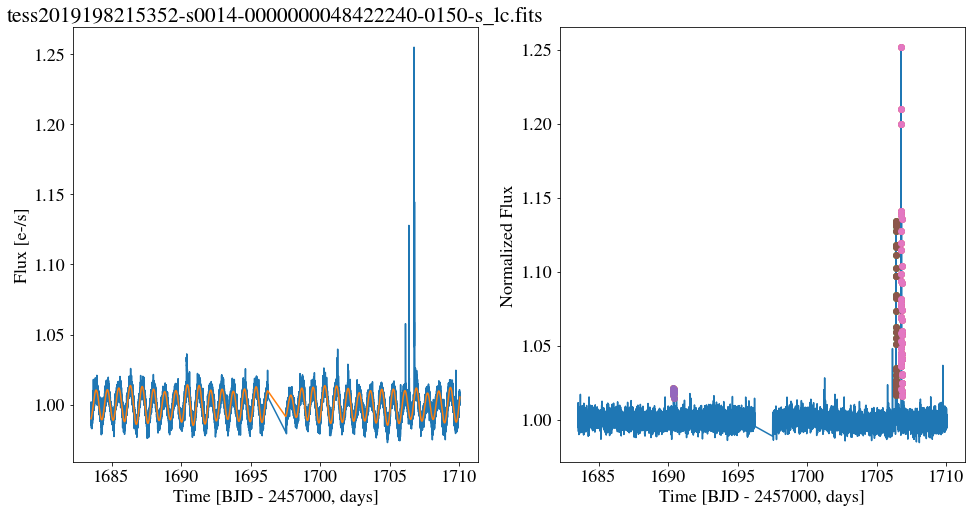

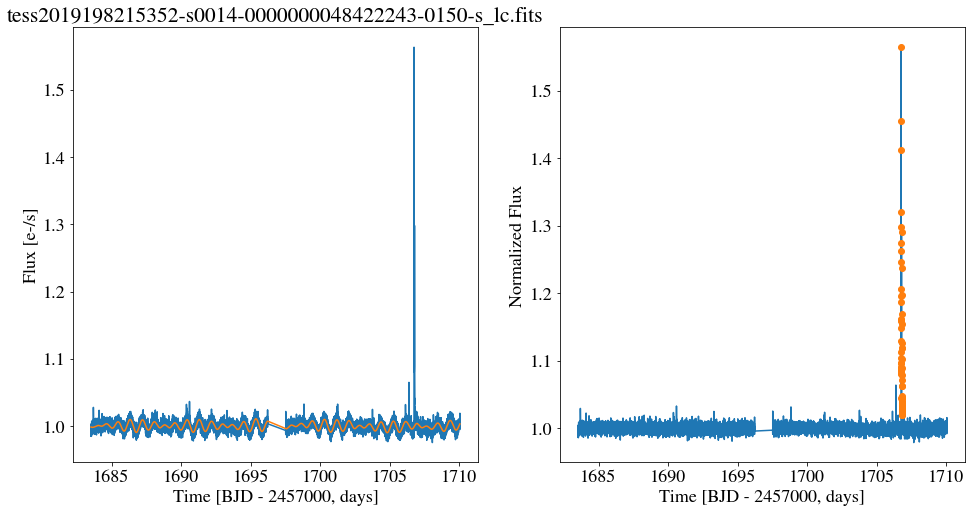

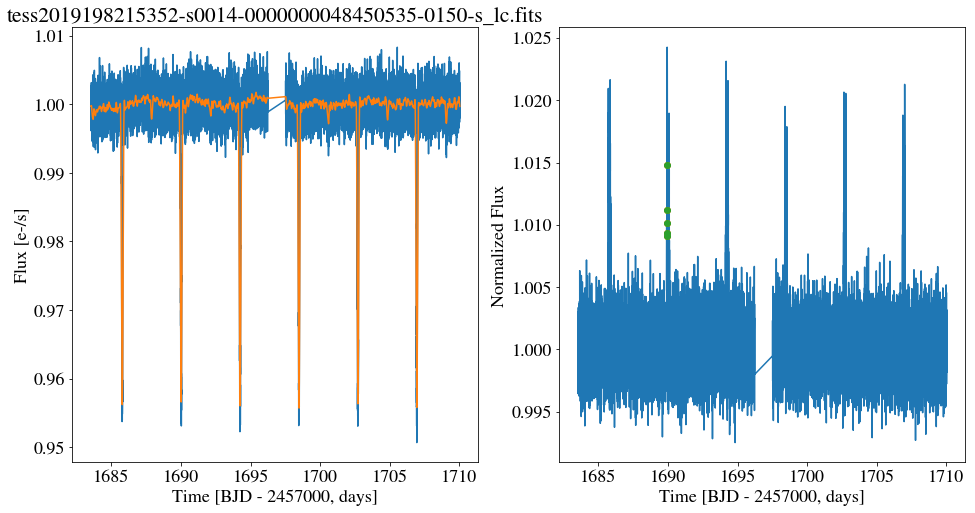

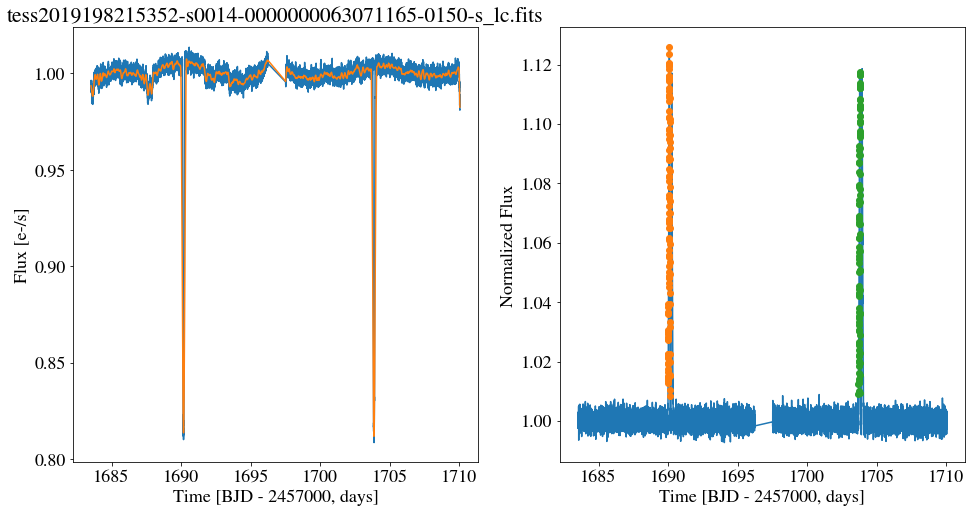

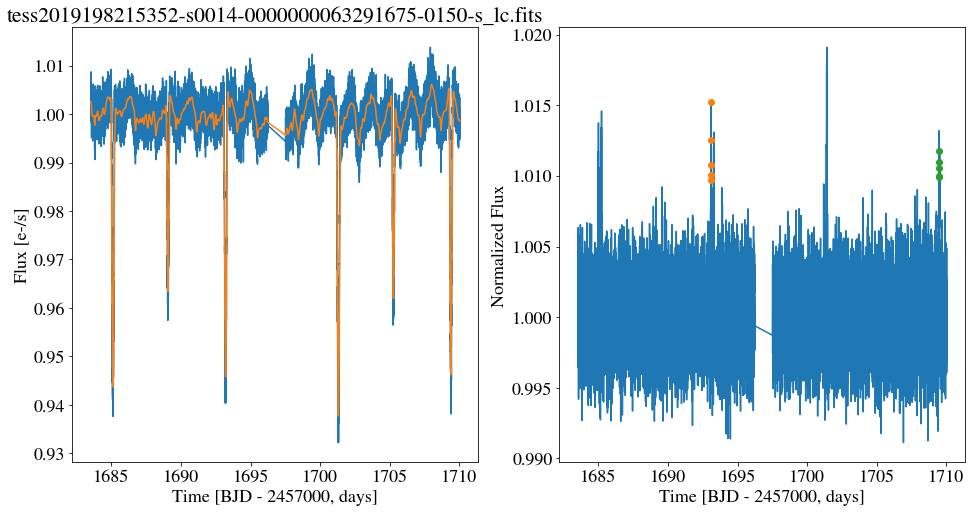

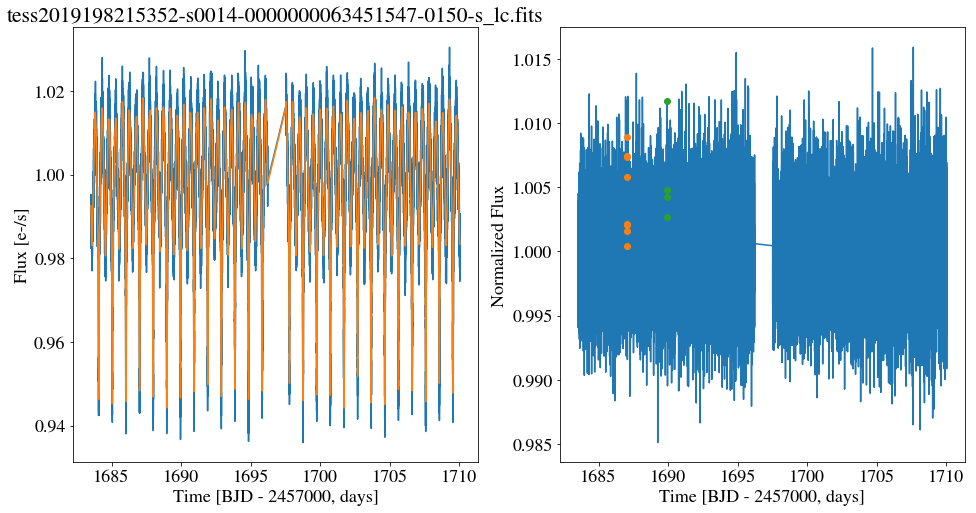

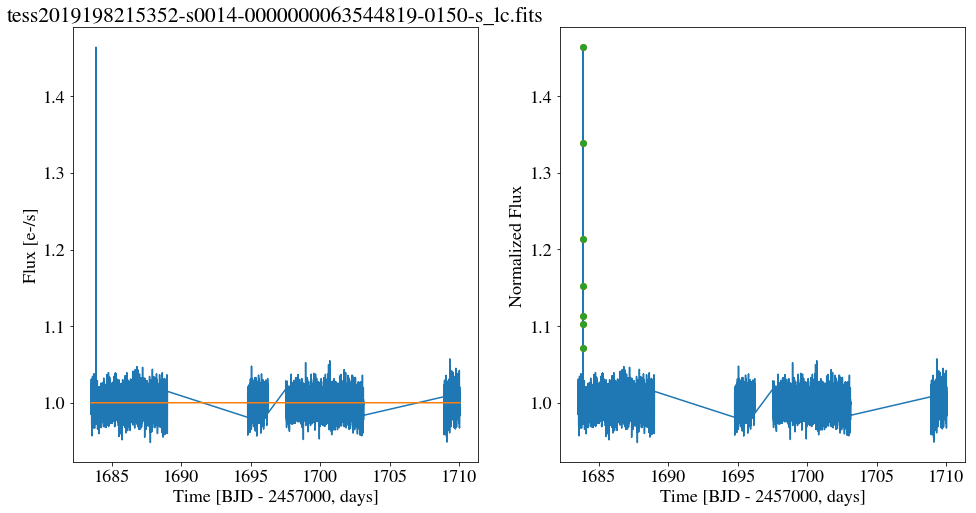

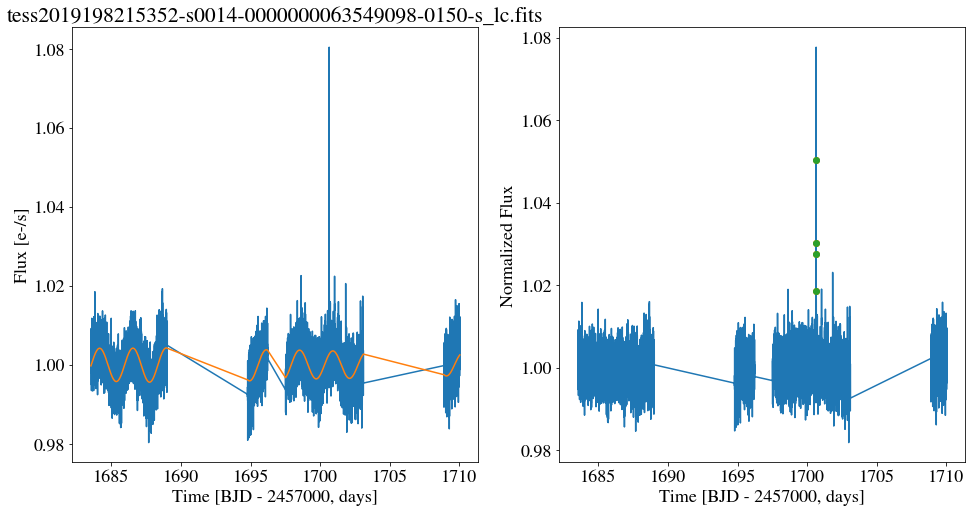

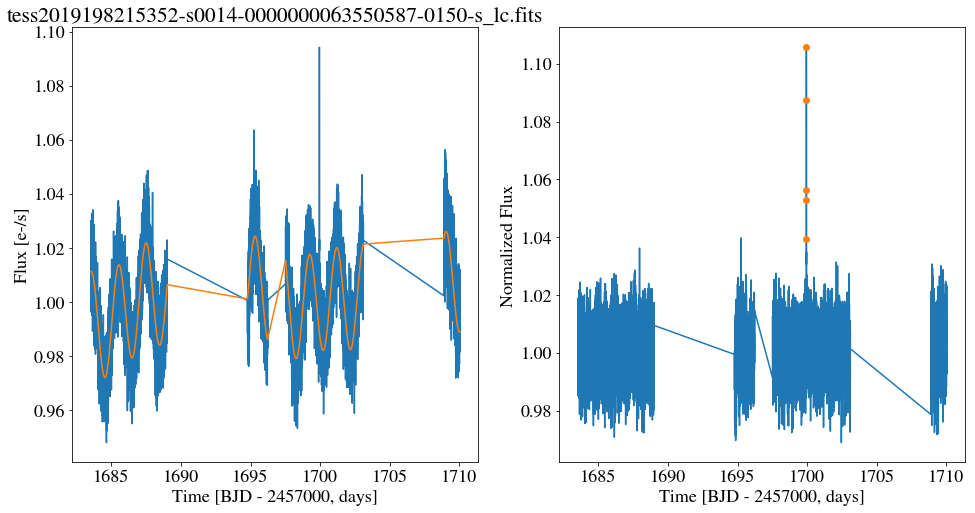

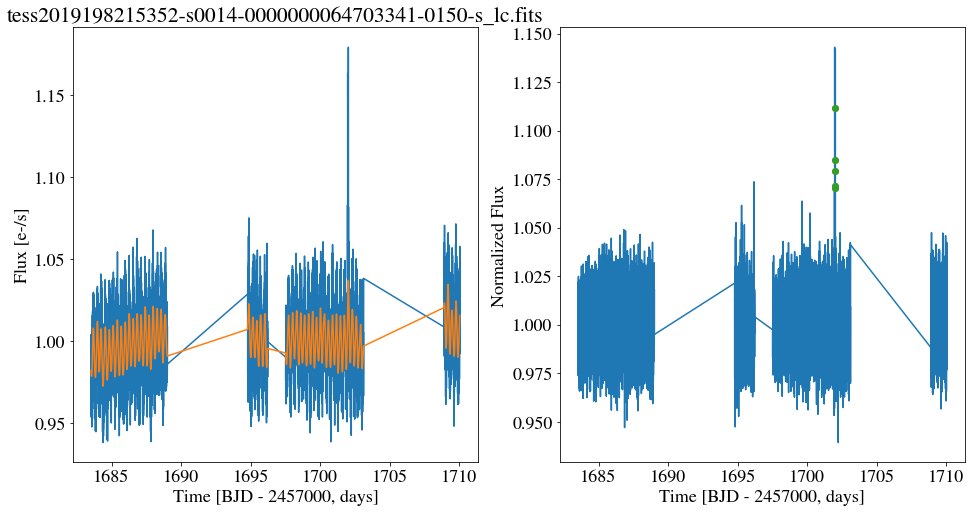

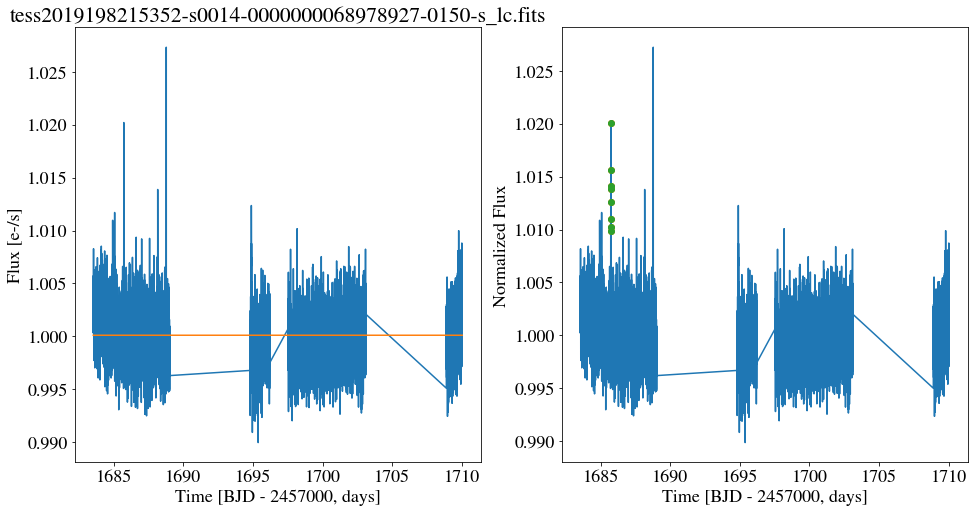

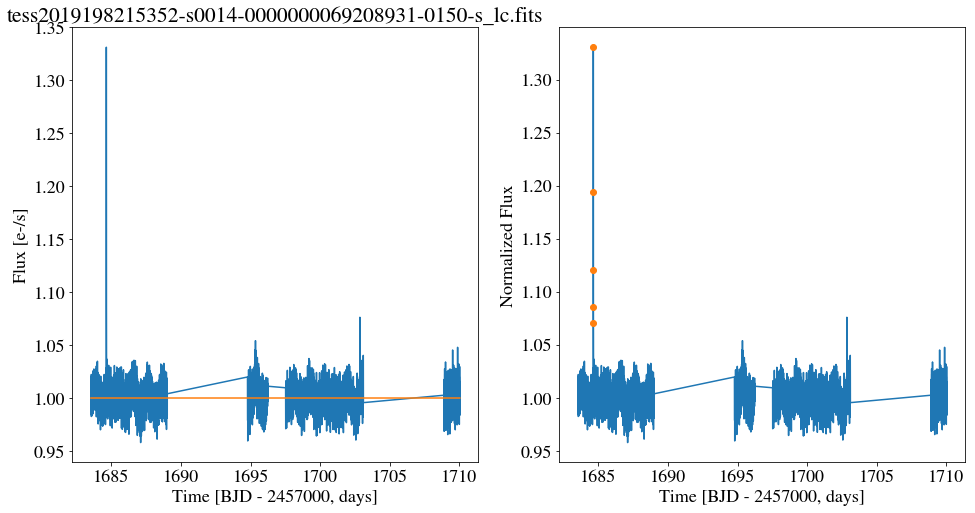

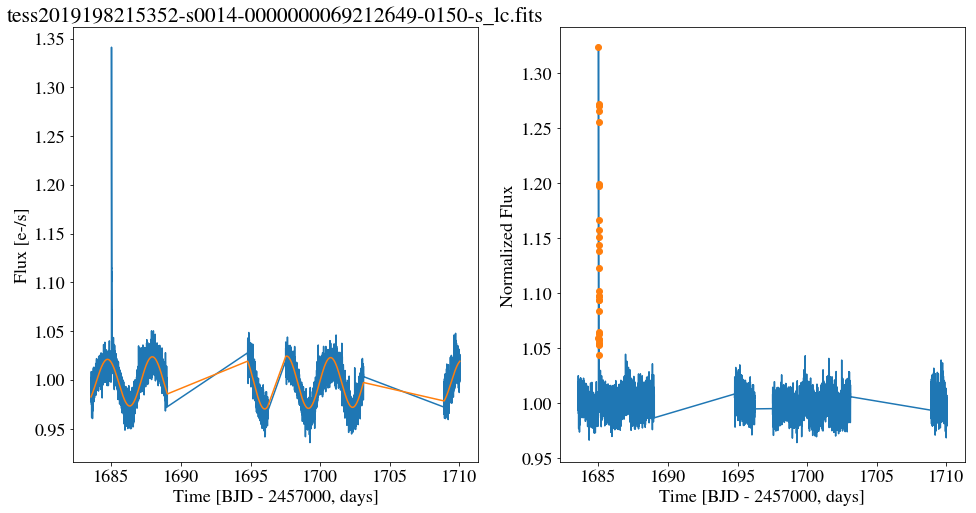

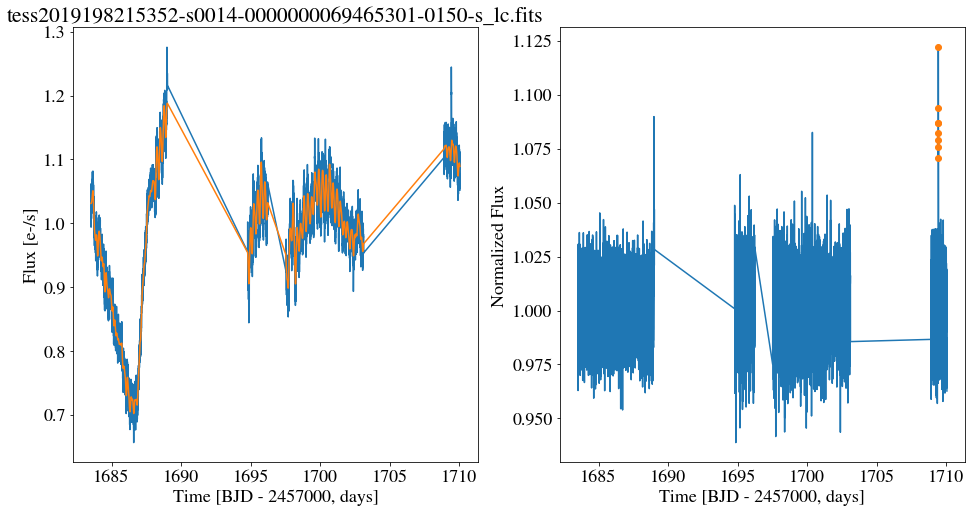

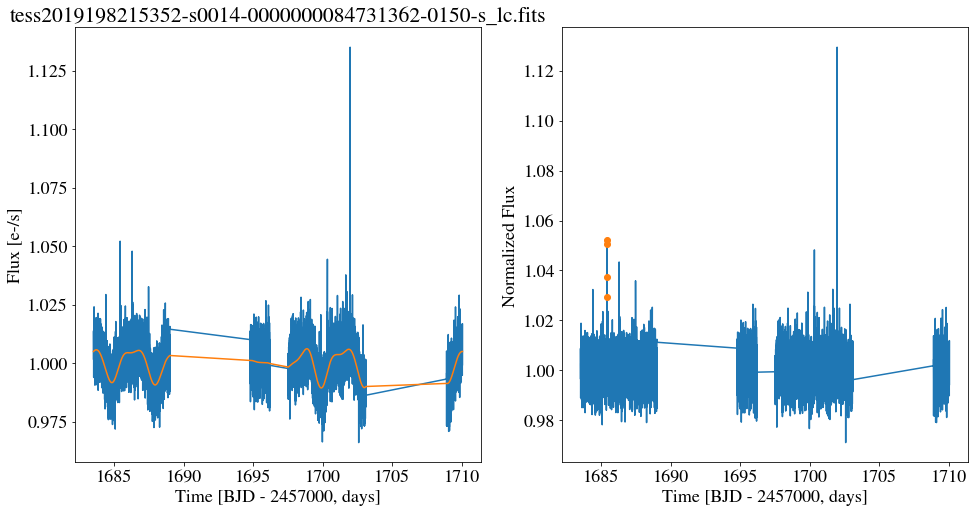

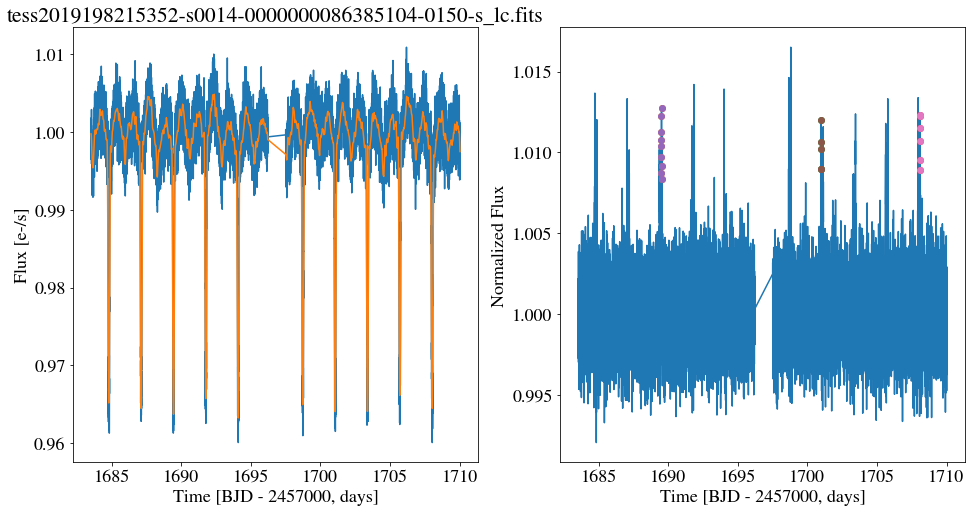

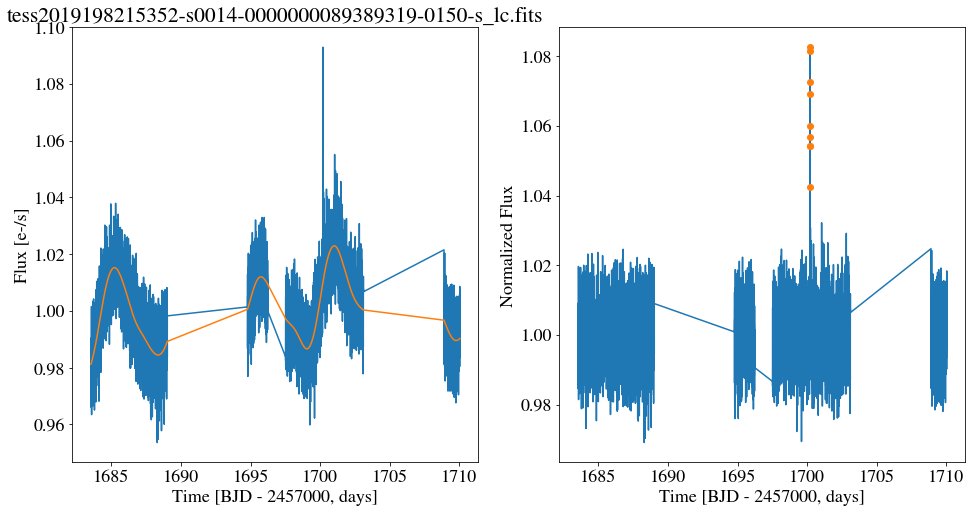

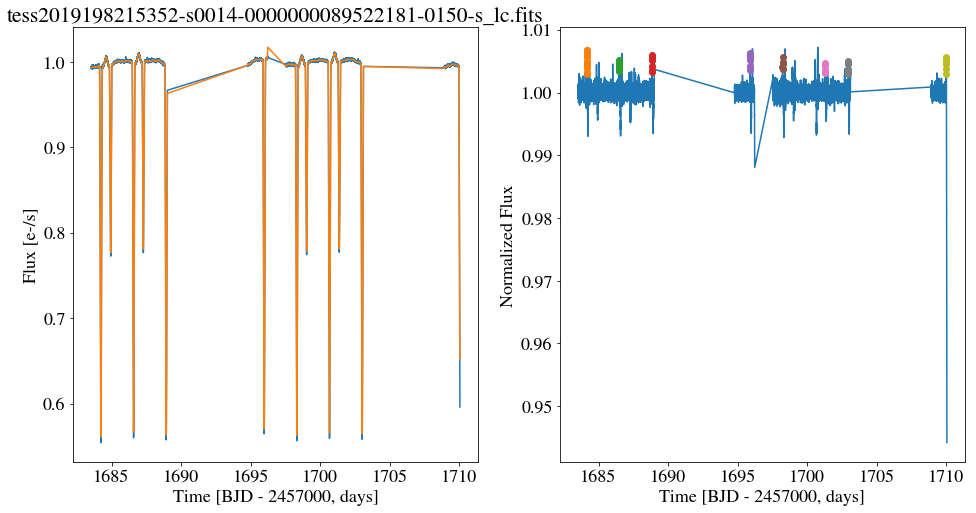

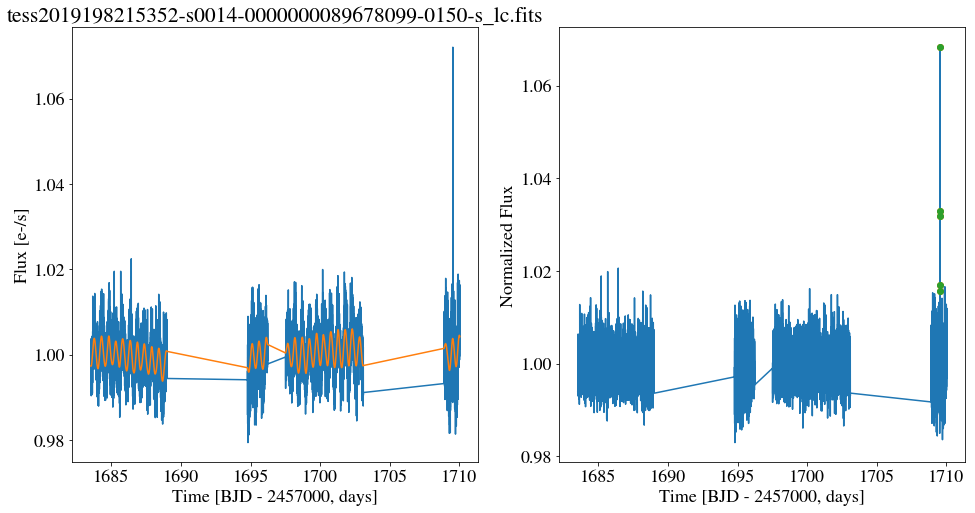

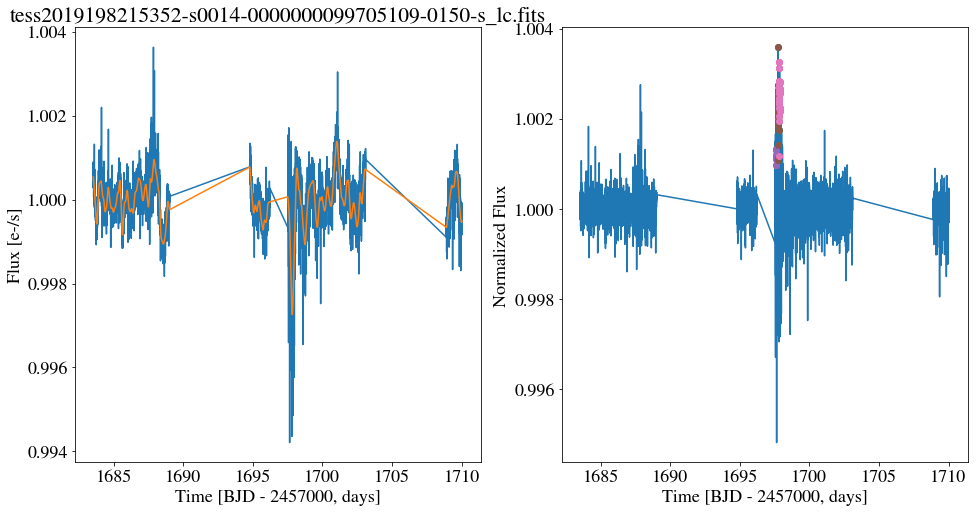

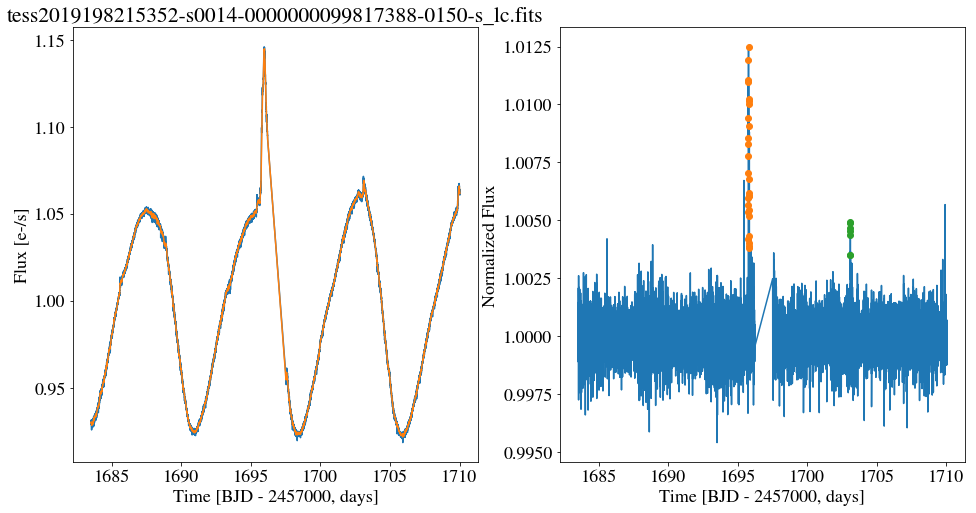

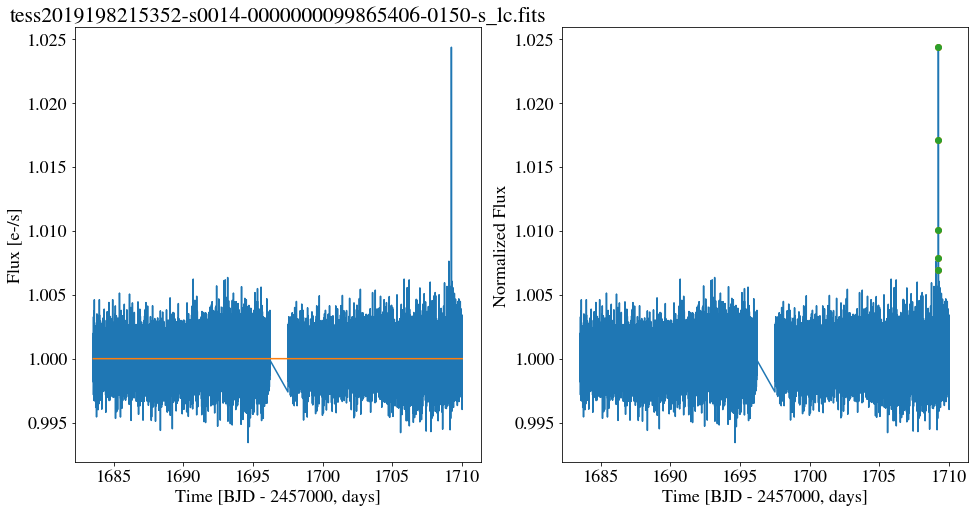

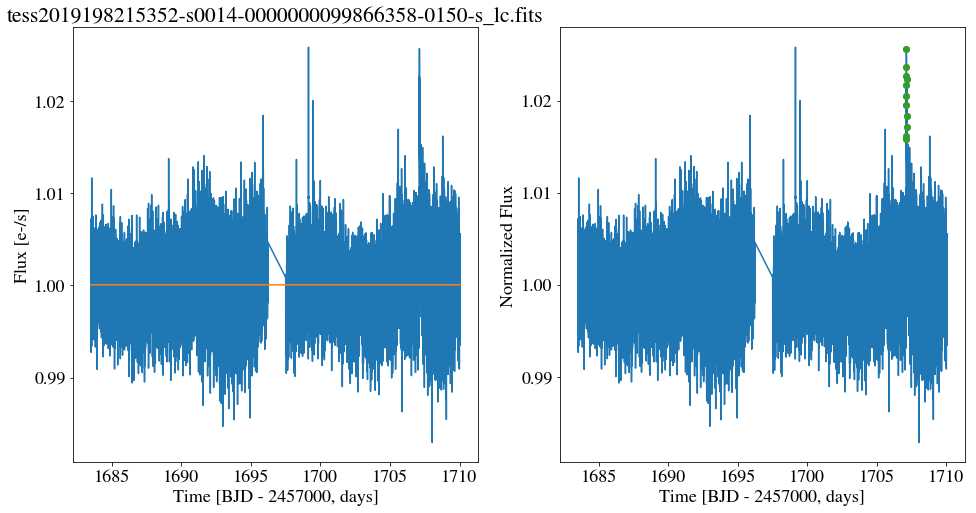

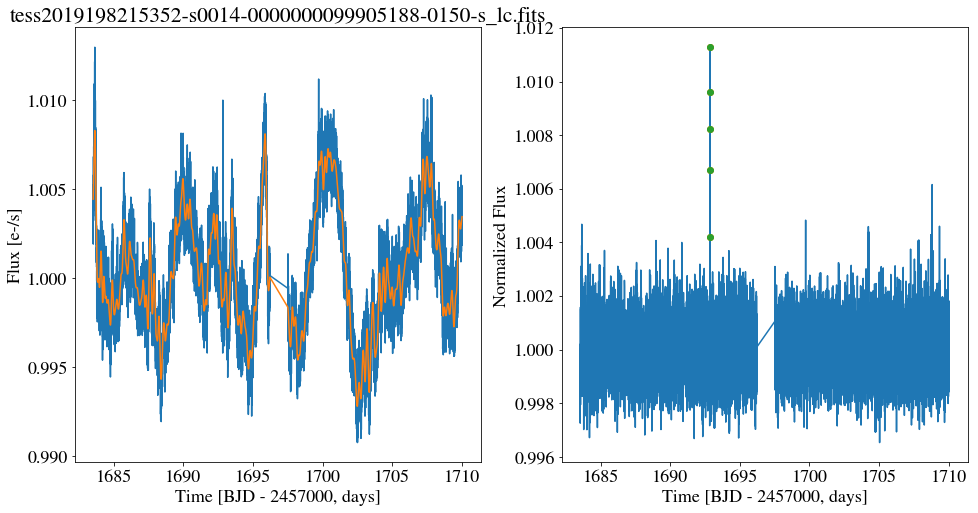

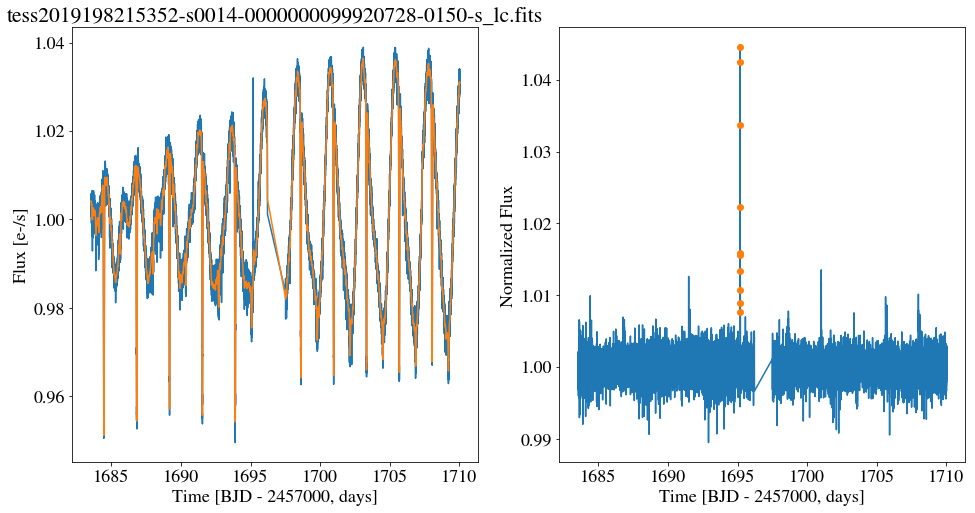

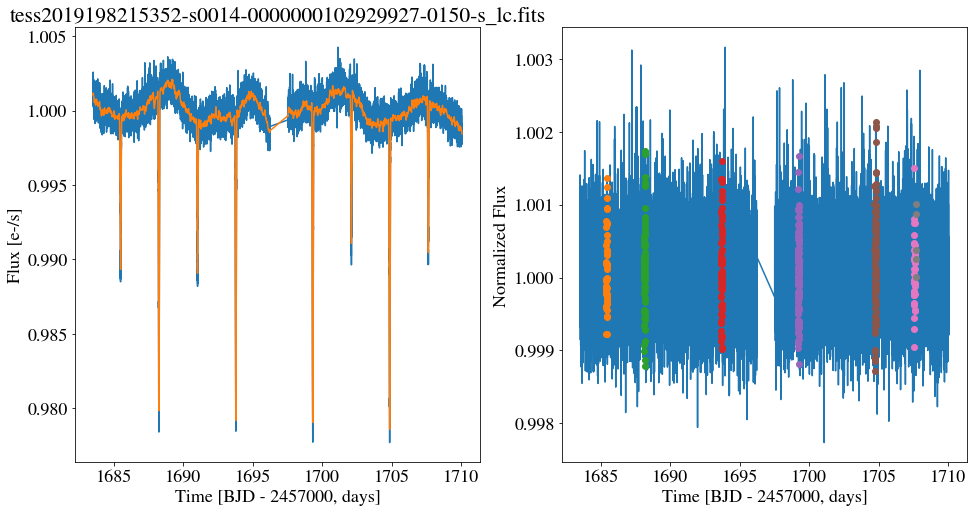

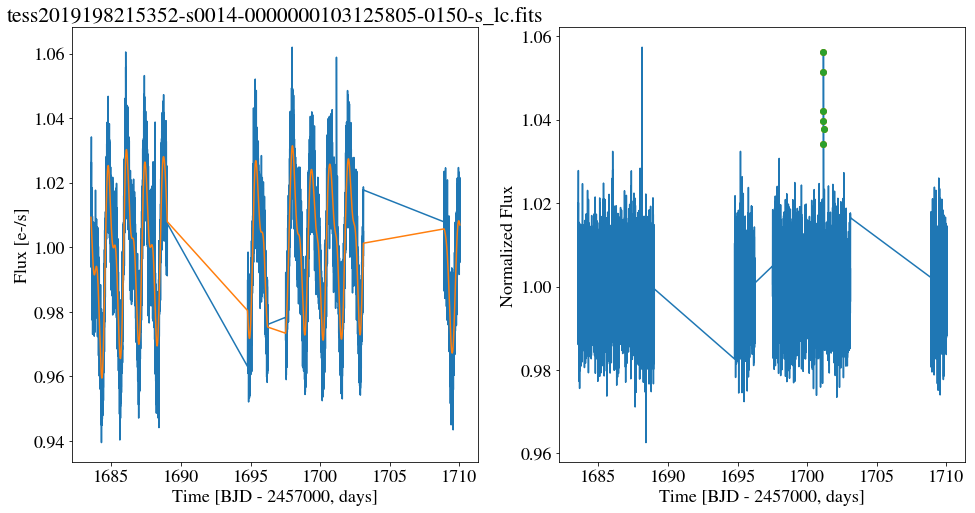

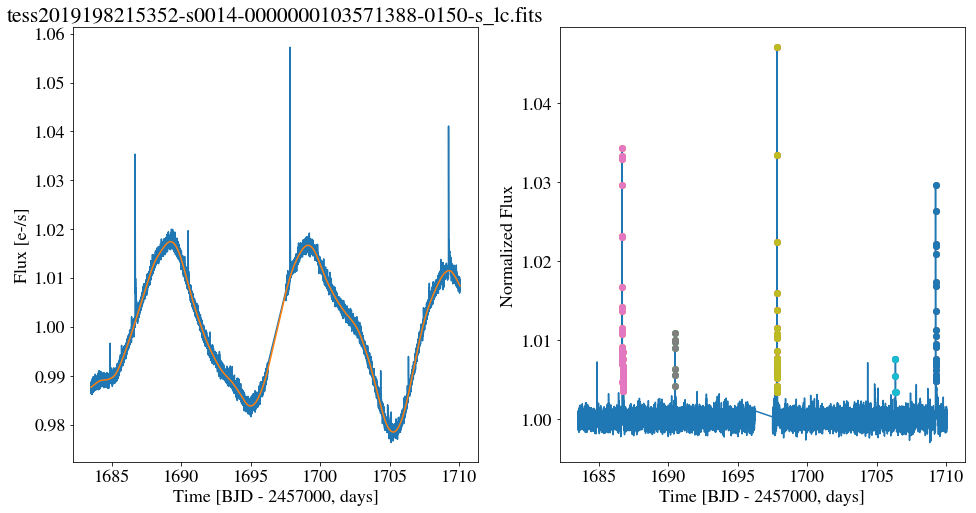

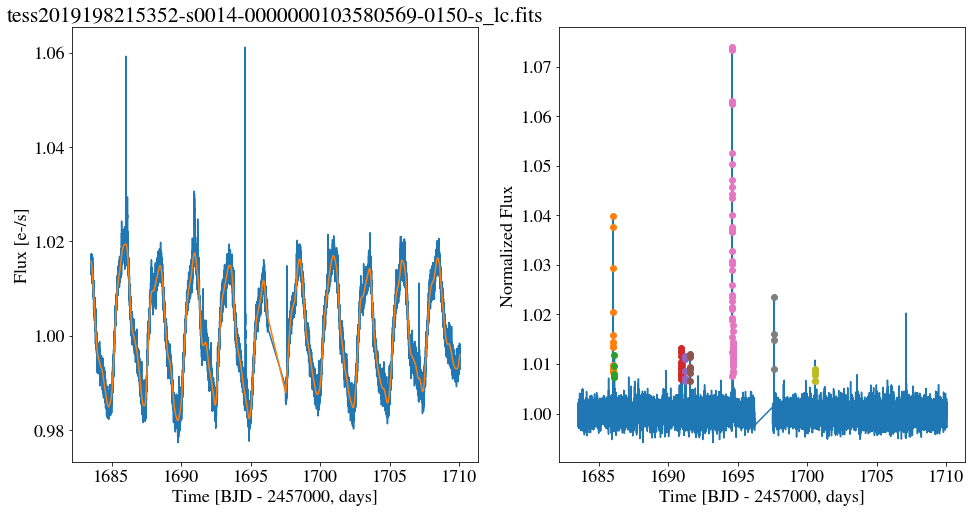

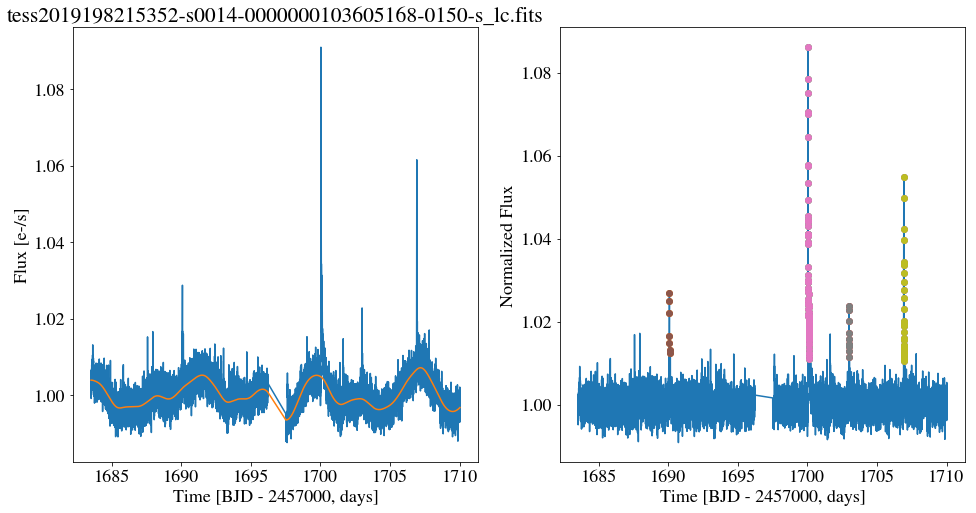

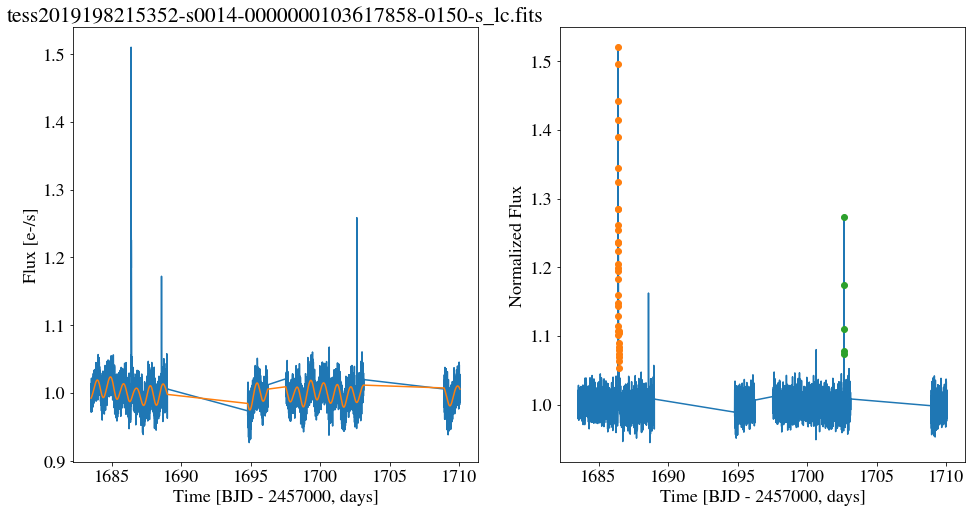

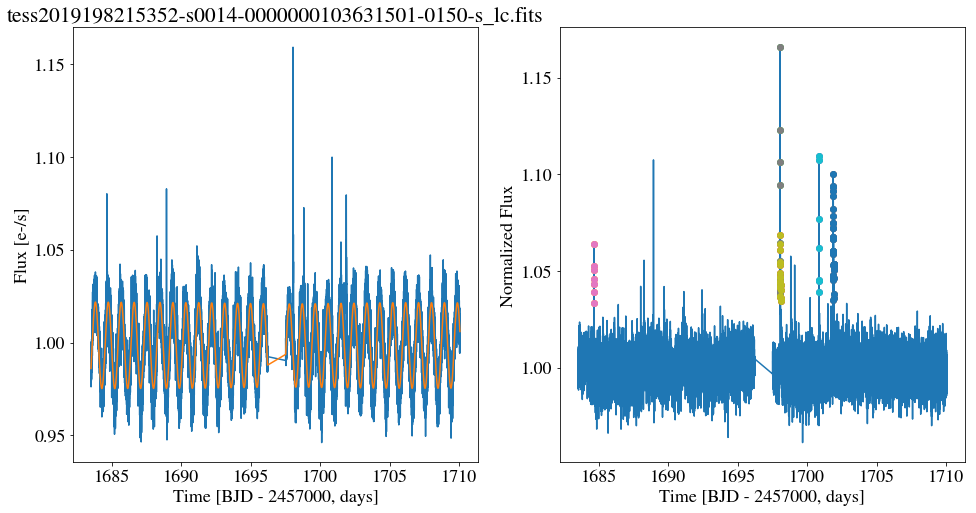

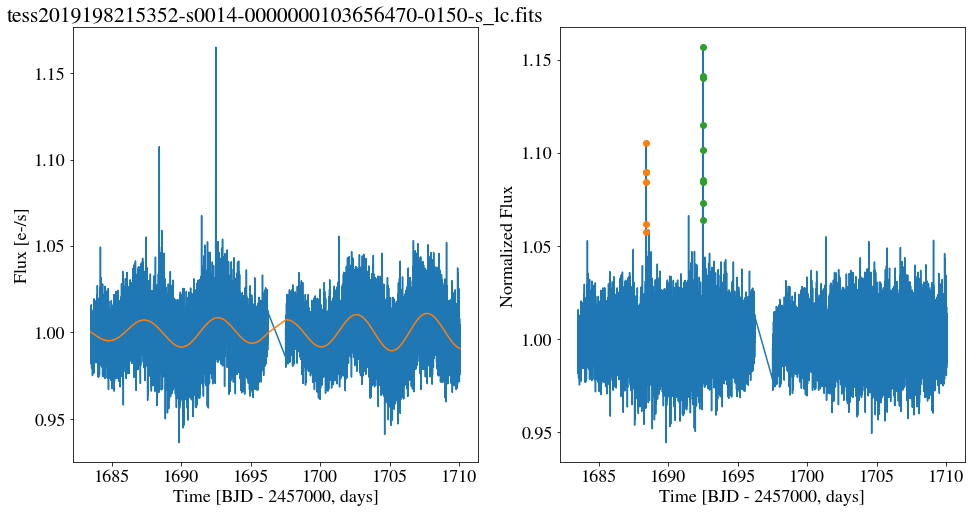

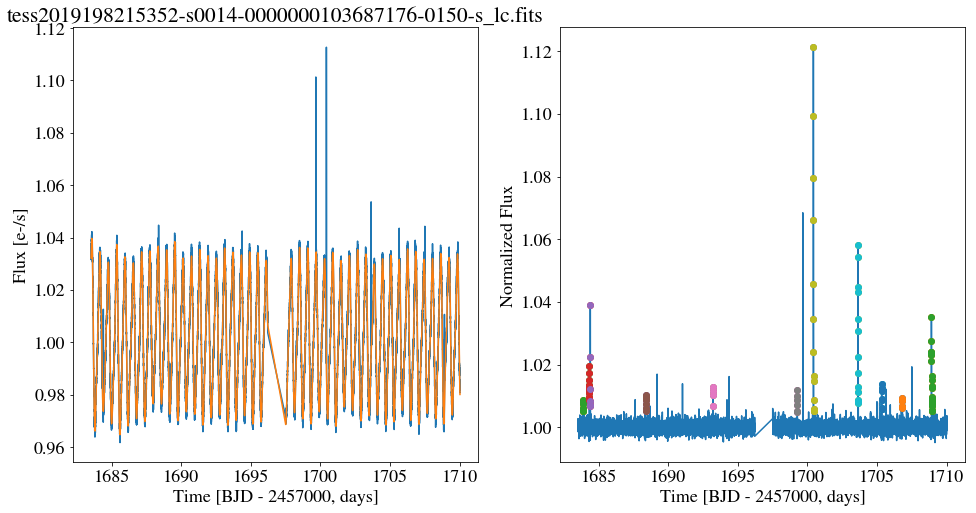

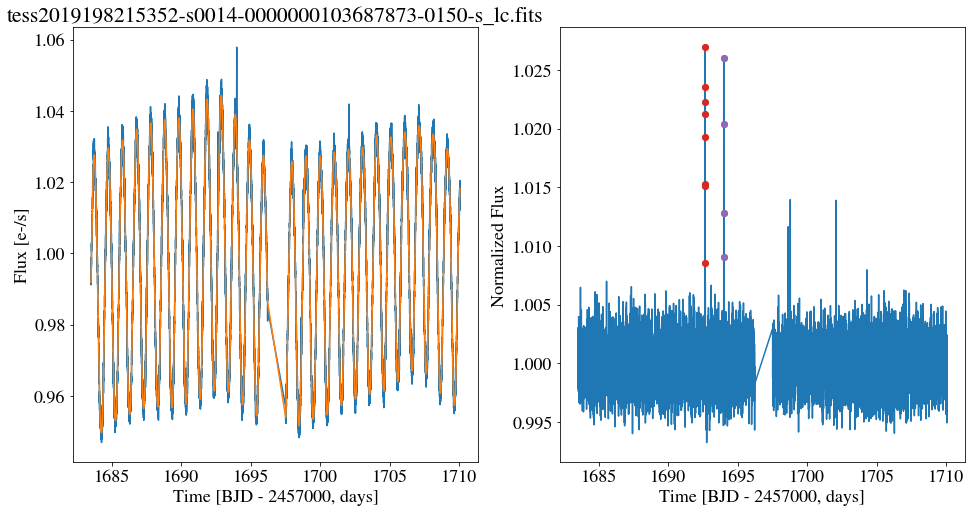

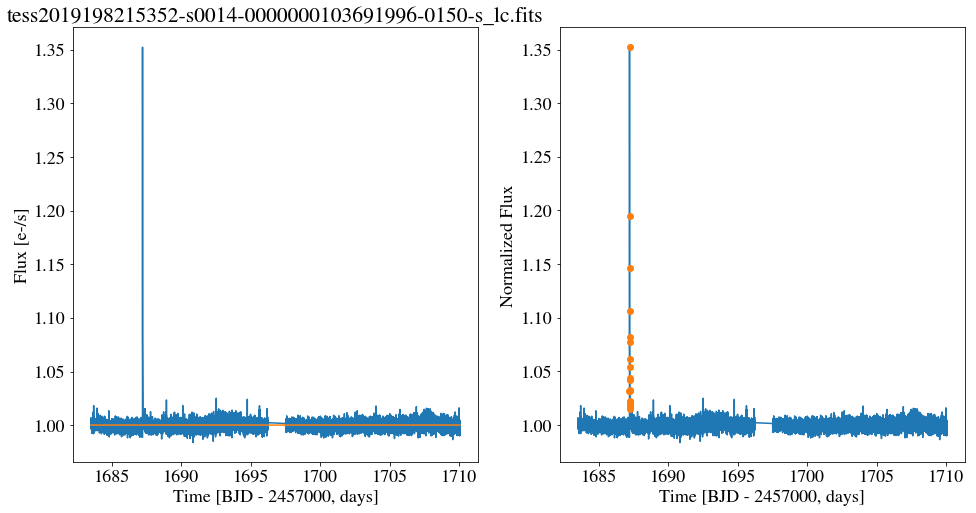

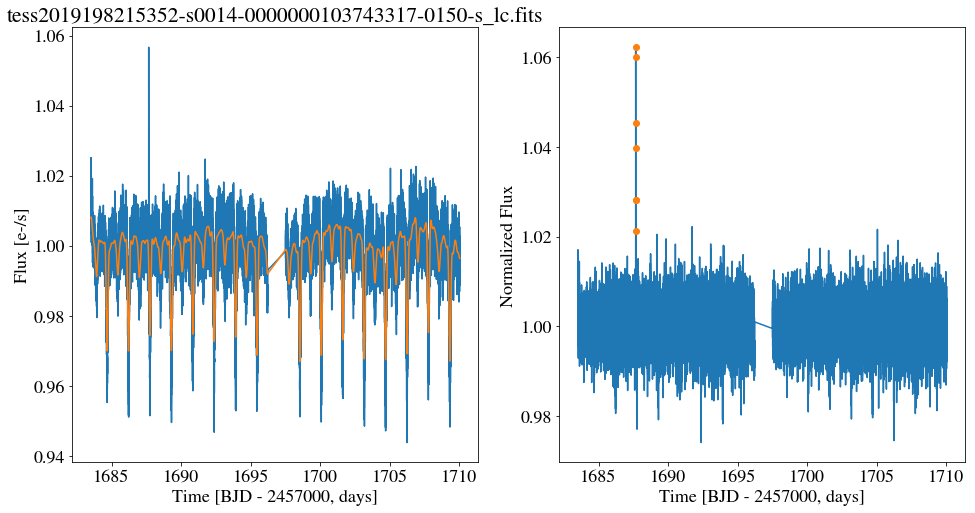

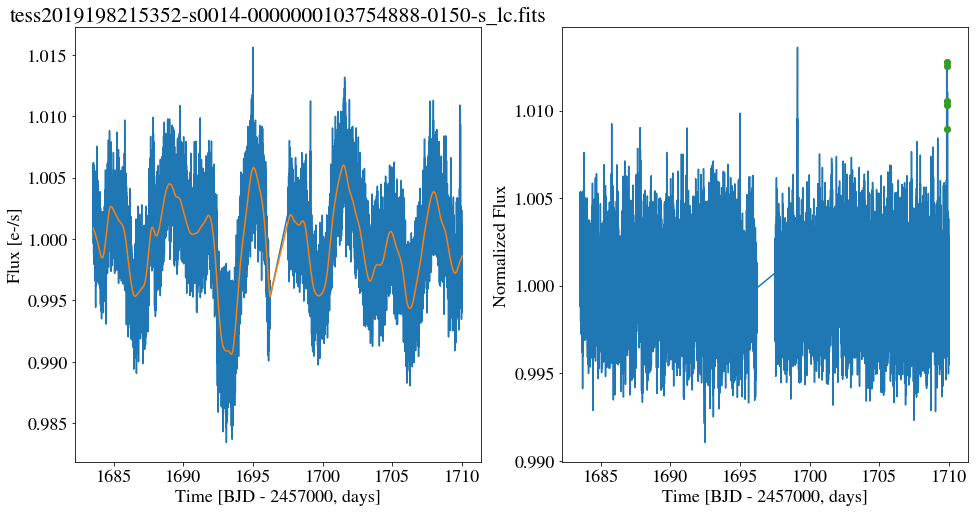

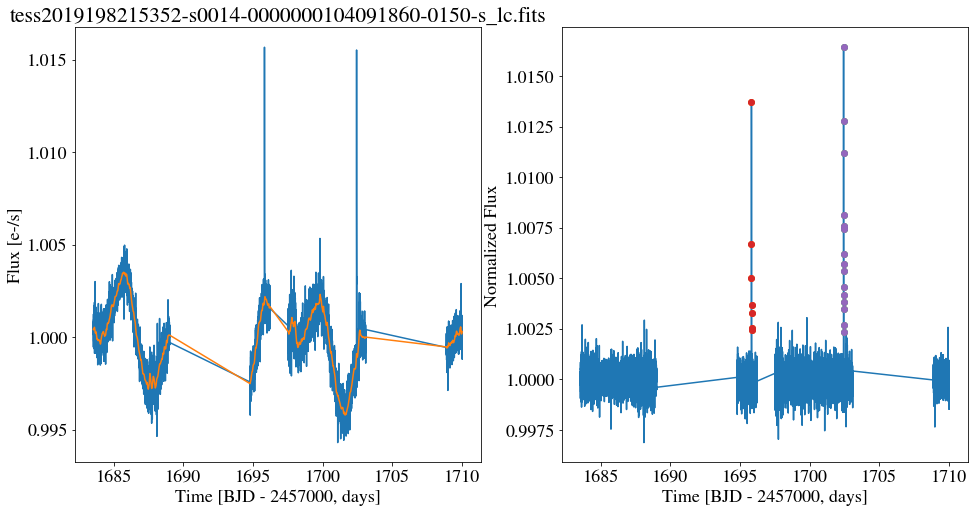

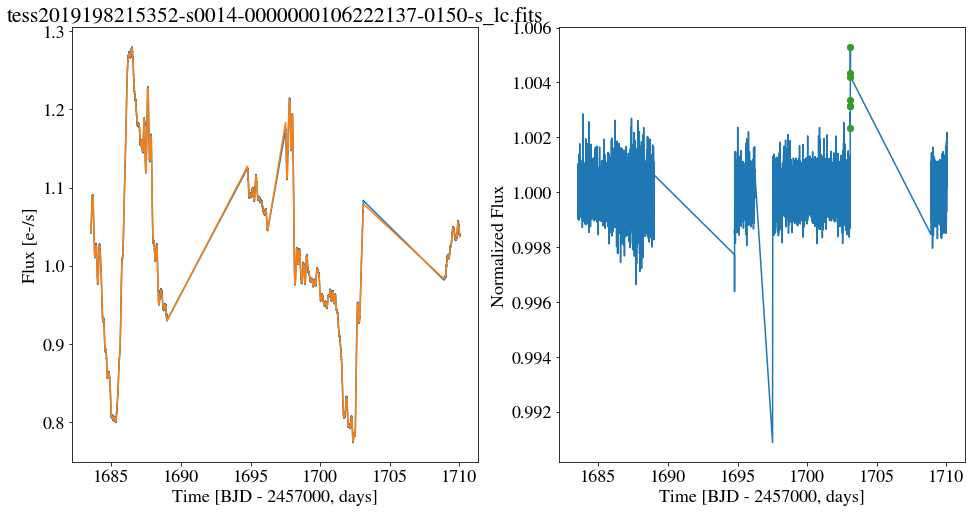

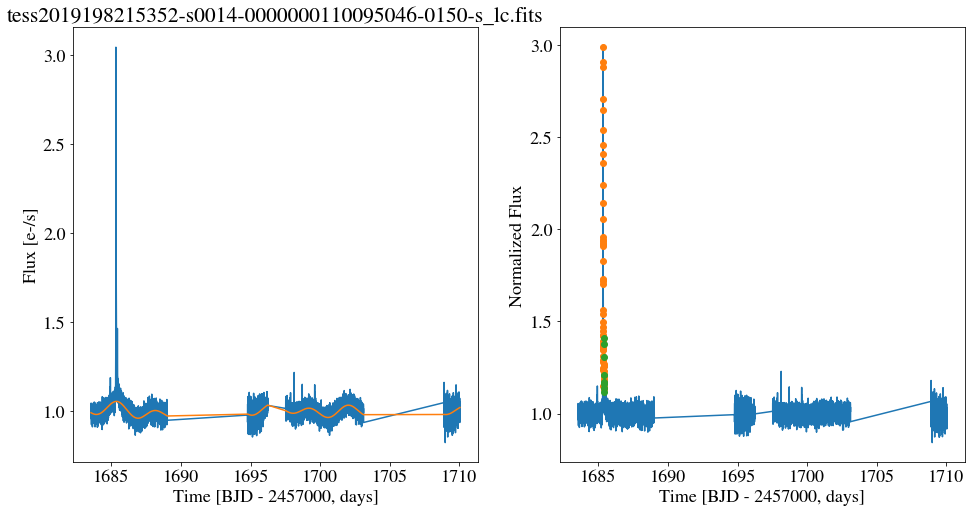

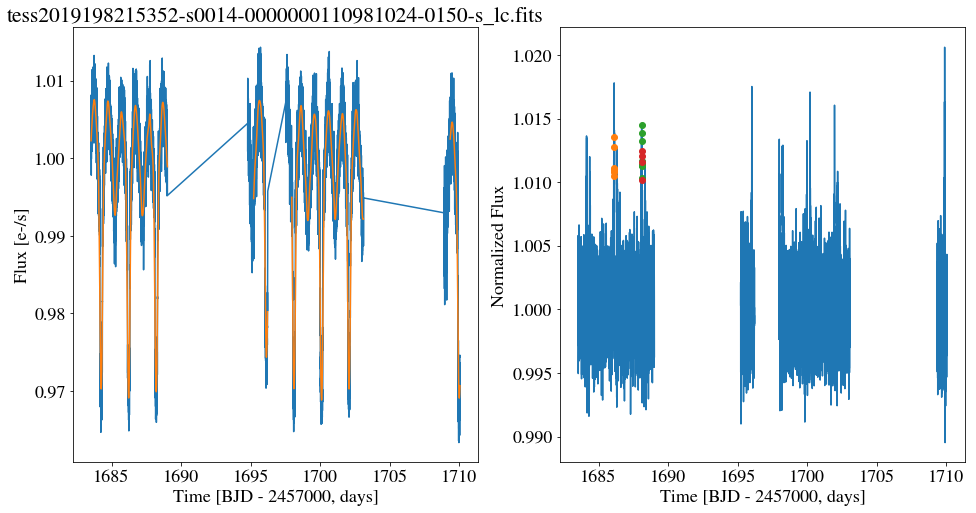

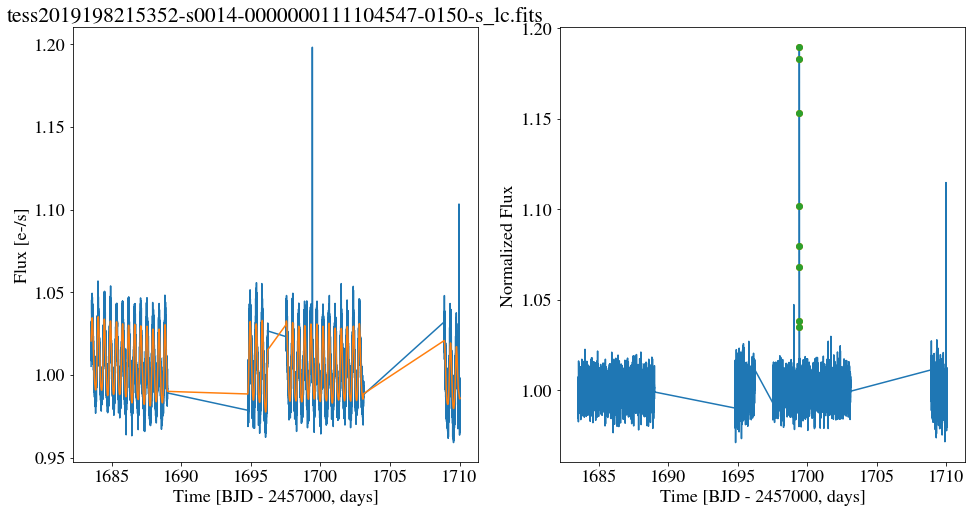

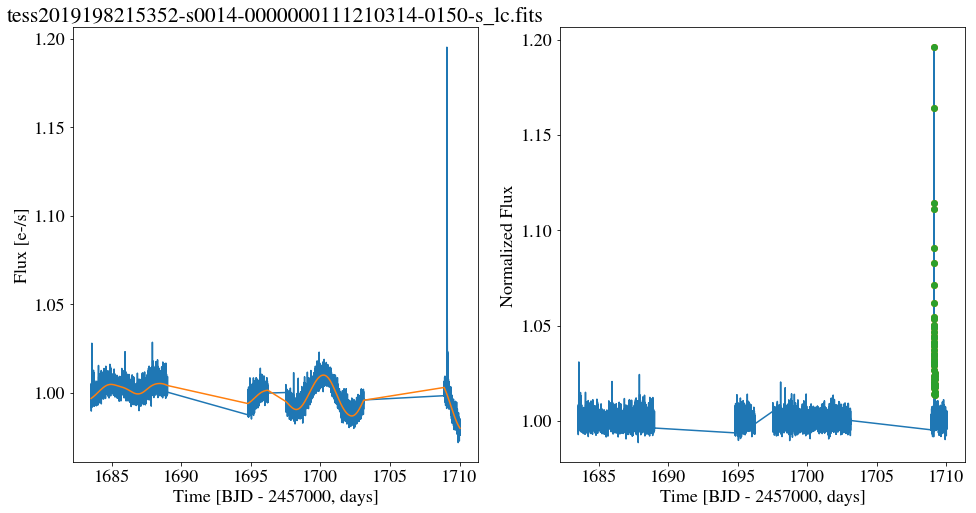

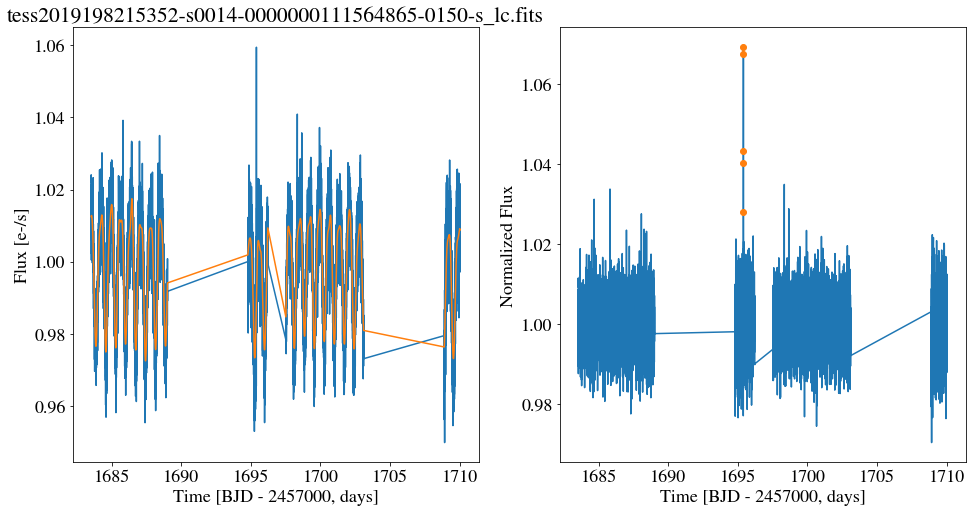

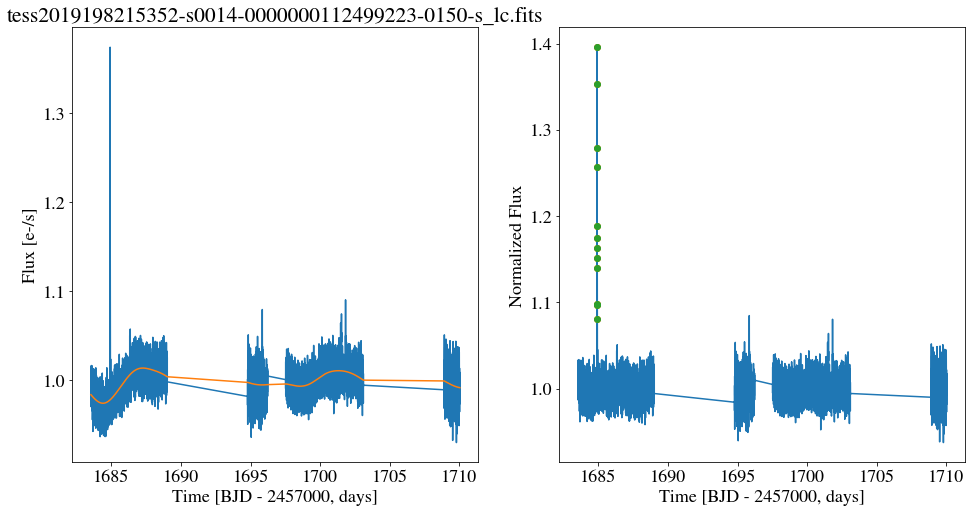

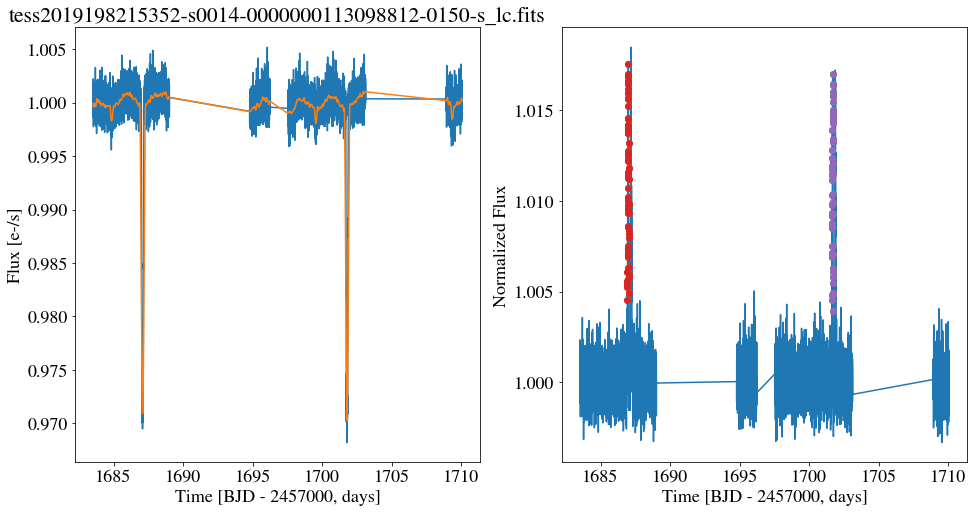

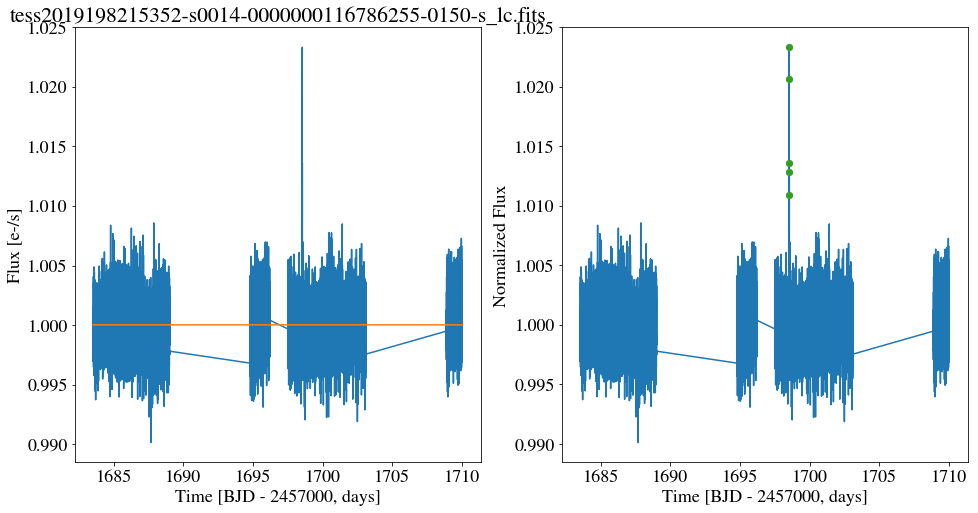

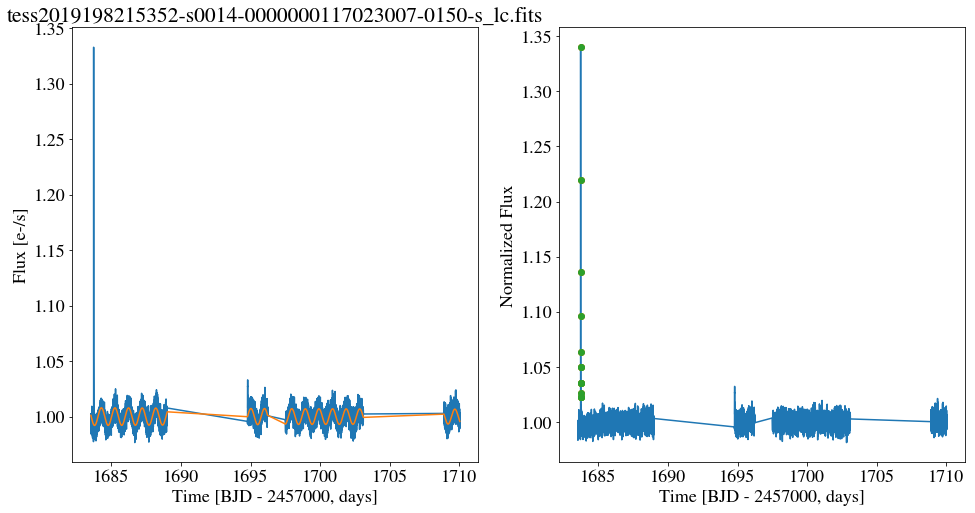

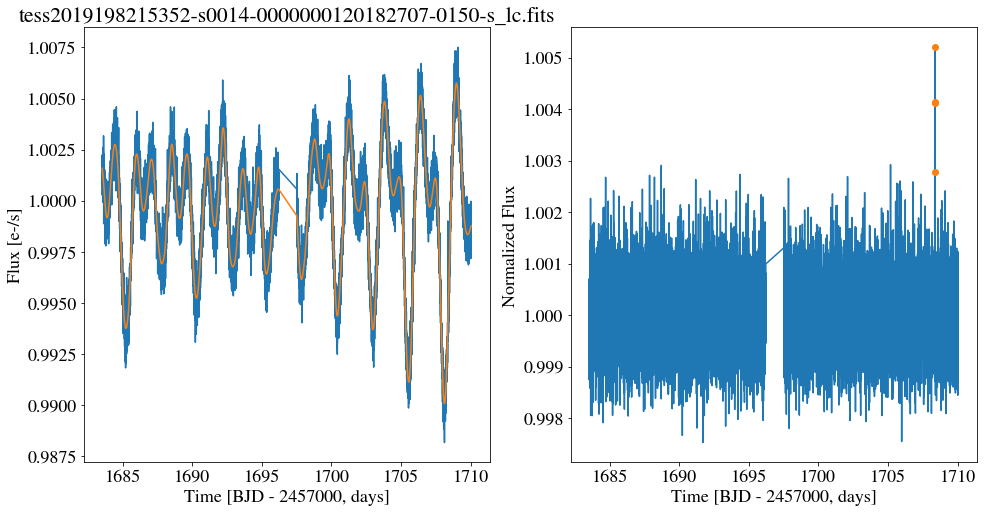

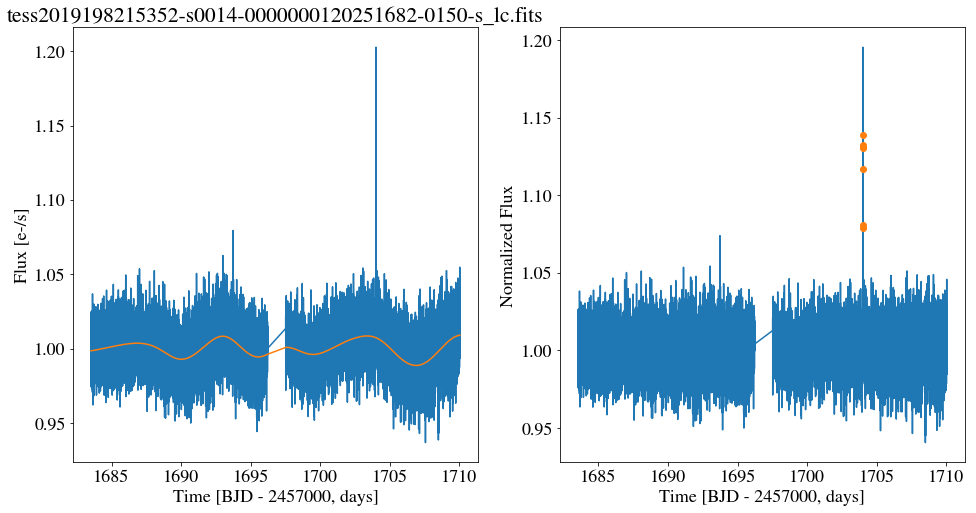

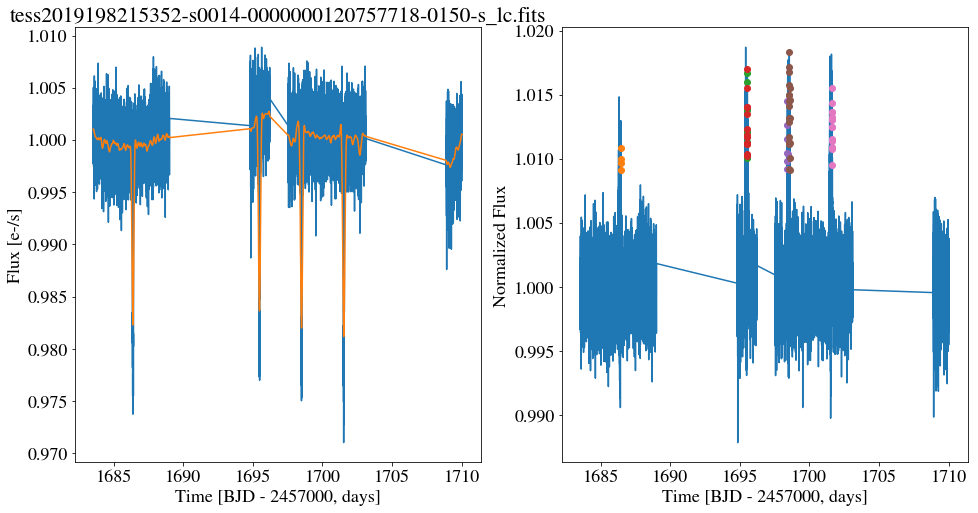

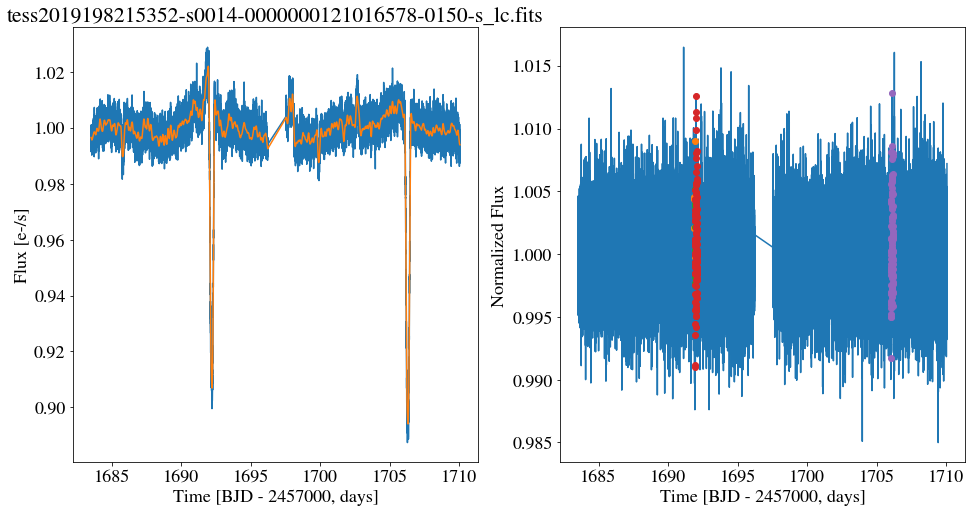

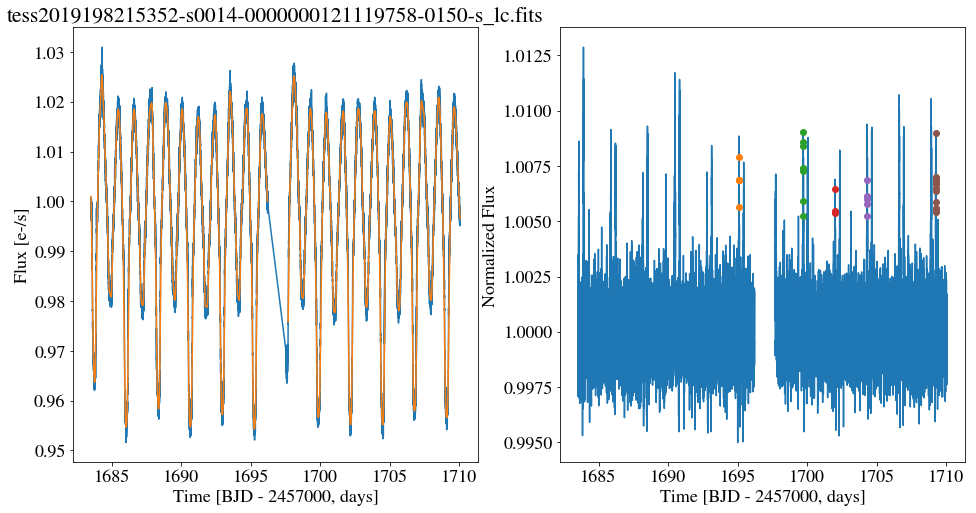

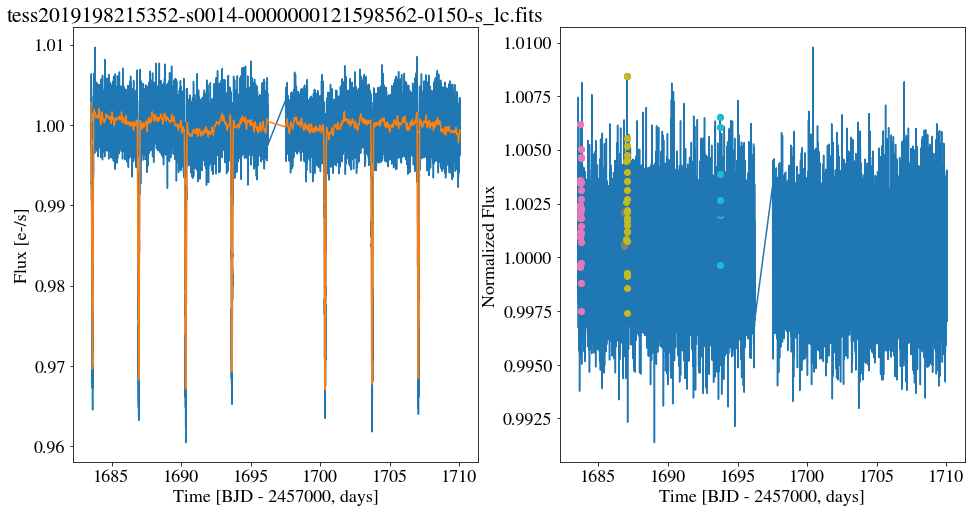

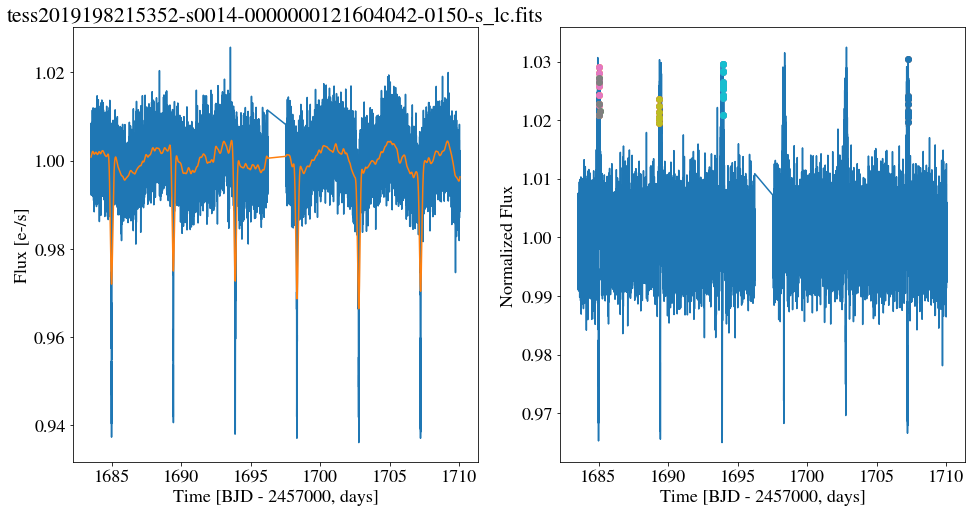

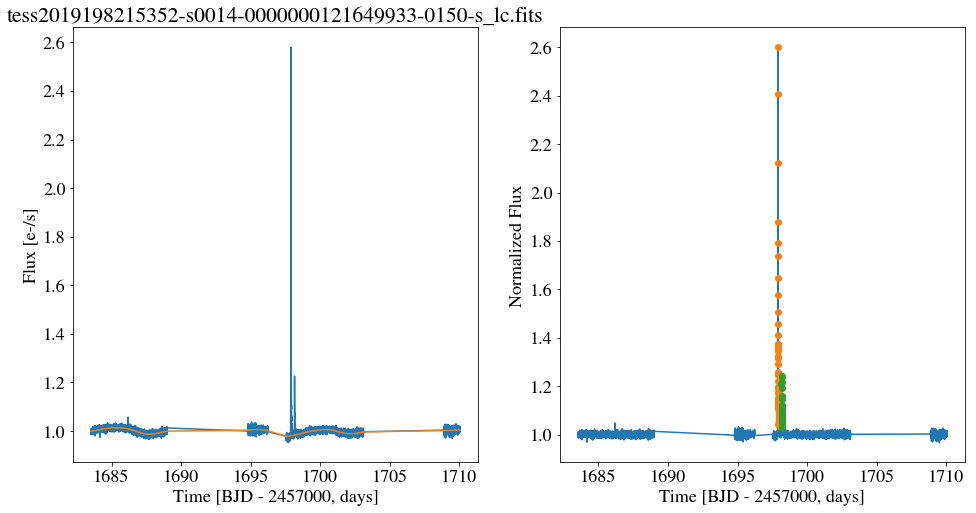

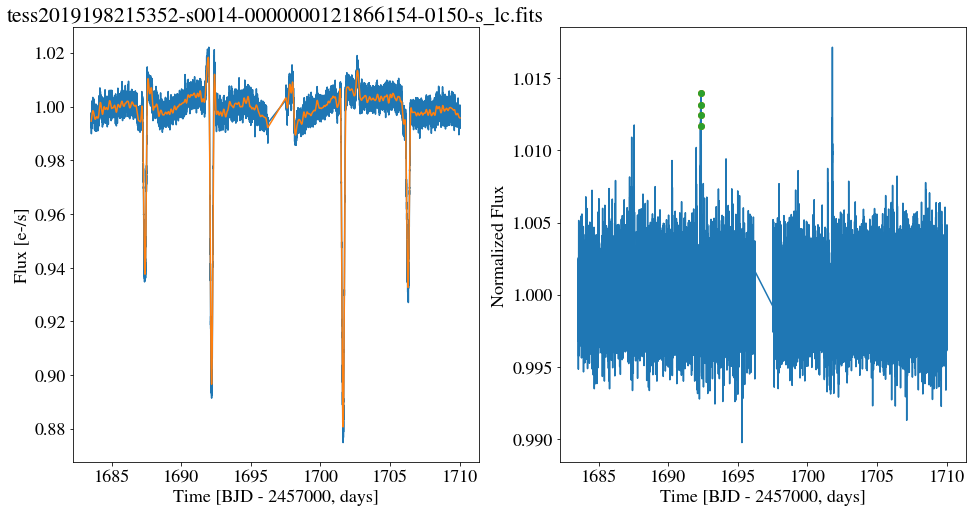

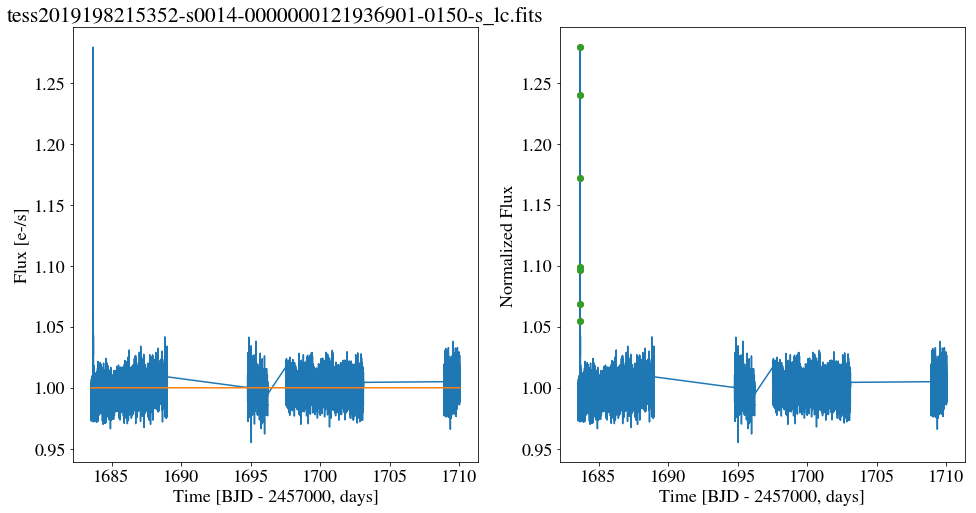

In [14]:
from flareTools import id_segments

for filename in np.unique(df['file'].values)[0:100]:
    tstart = df[df['file'] == filename]['t0'].values
    tstop = df[df['file'] == filename]['t1'].values
    
    fig, axes = plt.subplots(figsize=(16,8), nrows=1, ncols=2)
    
    with fits.open(path+filename, mode='readonly') as hdulist:
        tess_bjd = hdulist[1].data['TIME']
        pdcsap_flux = hdulist[1].data['PDCSAP_FLUX']
        pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']
        quality = hdulist[1].data['QUALITY']
        
    smo, var = np.loadtxt(path+filename+'.gp')
    ok_cut = (quality == 0) & (~np.isnan(tess_bjd)) & (~np.isnan(pdcsap_flux)) & (~np.isnan(pdcsap_flux_error))
    
    dt_limit = 12/24 # 12 hours
    trim = 4/24 # 4 hours
    istart, istop = id_segments(tess_bjd[ok_cut], dt_limit, dt_trim=trim)

    time_c = np.array([])
    flux_c = np.array([])
    error_c = np.array([])

    for seg_idx in range(len(istart)):
        tess_bjd_seg = tess_bjd[ok_cut][istart[seg_idx]:istop[seg_idx]]
        pdcsap_flux_seg = pdcsap_flux[ok_cut][istart[seg_idx]:istop[seg_idx]]
        pdcsap_flux_error_seg = pdcsap_flux_error[ok_cut][istart[seg_idx]:istop[seg_idx]]

        time_c = np.concatenate((time_c, tess_bjd_seg), axis=0)
        flux_c = np.concatenate((flux_c, pdcsap_flux_seg), axis=0)
        error_c = np.concatenate((error_c, pdcsap_flux_error_seg), axis=0)
        
    median = np.nanmedian(flux_c)
    
    axes[0].plot(time_c, flux_c/median)
    axes[0].plot(time_c, smo)
    axes[0].set_xlabel('Time [BJD - 2457000, days]')
    axes[0].set_ylabel('Flux [e-/s]')
    axes[0].set_title(filename)
    
    x = time_c
    y = flux_c/median - smo + 1
    axes[1].plot(x, y)
    for idx in range(len((tstart))):
        indices = np.where((x >= tstart[idx]) & (x <= tstop[idx]))[0]
        axes[1].plot(x[indices], y[indices], 'o')
    axes[1].set_xlabel('Time [BJD - 2457000, days]')
    axes[1].set_ylabel('Normalized Flux')